In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

## Importing Data

In [47]:
fname = '../abortion.dta'
df = pd.read_stata(fname)

In [51]:
df[(df['year']==2000) & (df['fip'] == 1)  & (df['sex']== 2)]

fip age  race  year  sex  totpop           ir     crack  alcohol  \
360    1  20     2  2000    2   95892  1047.976685  0.843571     1.88   
361    1  25     1  2000    2  202886   202.773209  0.843571     1.88   
362    1  20     1  2000    2  199761   159.328354  0.843571     1.88   
363    1  40     2  2000    2   89681   587.811829  0.843571     1.88   
370    1  35     1  2000    2  242502   158.162094  0.843571     1.88   
371    1  30     2  2000    2   77998   945.295227  0.843571     1.88   
376    1  25     2  2000    2   82457  1015.837097  0.843571     1.88   
377    1  15     2  2000    2  105088   358.923828  0.843571     1.88   
378    1  35     2  2000    2   86324   906.777649  0.843571     1.88   
381    1  30     1  2000    2  213672   207.137939  0.843571     1.88   
382    1  40     1  2000    2  248003   187.500015  0.843571     1.88   
383    1  15     1  2000    2  205423   105.986191  0.843571     1.88   

      income  ...  repeal        acc  wht  male       lnr   t  younger   fa  \
360  23764.0  ...       0  16.205465    0     0  7.949197  16        0  NaN   
361  23764.0  ...       0  16.205465    1     0  4.400603  16        0  2.0   
362  23764.0  ...       0  16.205465    1     0  5.332719  16        0  NaN   
363  23764.0  ...       0  16.205465    0     0  4.663439  16        0  NaN   
370  23764.0  ...       0  16.205465    1     0  3.068053  16        0  NaN   
371  23764.0  ...       0  16.205465    0     0  5.950382  16        0  NaN   
376  23764.0  ...       0  16.205465    0     0  6.914731  16        0  2.0   
377  23764.0  ...       0  16.205465    0     0  7.866569  16        1  1.0   
378  23764.0  ...       0  16.205465    0     0  5.266311  16        0  NaN   
381  23764.0  ...       0  16.205465    1     0  3.198673  16        0  NaN   
382  23764.0  ...       0  16.205465    1     0  2.186051  16        0  NaN   
383  23764.0  ...       0  16.205465    1     0  5.224133  16        1  1.0   

     pi  bf15  
360   0     0  
361   0     0  
362   0     0  
363   0     0  
370   0     0  
371   0     0  
376   0     0  
377   1     1  
378   0     0  
381   0     0  
382   0     0  
383   1     0  

[12 rows x 22 columns]

In [49]:
df.columns

Index(['fip', 'age', 'race', 'year', 'sex', 'totpop', 'ir', 'crack', 'alcohol',
       'income', 'ur', 'poverty', 'repeal', 'acc', 'wht', 'male', 'lnr', 't',
       'younger', 'fa', 'pi', 'bf15'],
      dtype='object')

## Exploration

Number of observations - 19584
Number of variables - 22
Variables name definitions:
   - fip - State FIPS code
   - age - Age in years
   - race - Race: 1 = white, 2 = black
   - year - Year
   - t - Year but on a different scale
   - sex - Sex: 1 = male, 2 = female
   - totpop - Total population
   - ir - Incarcerated Males per 100,000
   - crack - Crack index
   - alcohol - Alcohol consumption per capita
   - income - Real income per capita
   - ur - State unemployment rate
   - poverty - Poverty rate
   - repeal - In a state with an early repeal of abortion prohibition
   - acc - AIDS mortality per 100,000 cumulative in t, t-1, t-2, t-3
   - wht - White Indicator
   - male - Male Indicator
   - lnr - Logged gonnorhea cases per 100,000 in 15-19 year olds
   - younger - From the younger group
   - fa - State-younger interaction
   - pi - Parental involvement law in effect
   - bf15 - Is a black female in the 15-19 age group

In [38]:
df.head()

fip age  race  year  sex  totpop          ir     crack  alcohol   income  \
0    1  30     2  1985    1   78805  371.475800  0.217438      1.9  11566.0   
1    1  15     1  1985    2  224003   51.389252  0.217438      1.9  11566.0   
2    1  20     2  1985    2   94113  390.875671  0.217438      1.9  11566.0   
3    1  20     1  1985    1  252076  100.836800  0.217438      1.9  11566.0   
4    1  20     2  1985    1   94113  390.875671  0.217438      1.9  11566.0   

   ...  repeal       acc  wht  male       lnr  t  younger   fa  pi  bf15  
0  ...       0  0.679504    0     1  7.880880  1        0  NaN   0     0  
1  ...       0  0.679504    1     0  6.362165  1        1  1.0   0     0  
2  ...       0  0.679504    0     0  8.917793  1        0  NaN   0     0  
3  ...       0  0.679504    1     1  5.906995  1        0  NaN   0     0  
4  ...       0  0.679504    0     1  9.072009  1        0  NaN   0     0  

[5 rows x 22 columns]

## Feature Distributions

In [39]:
def plot_distribution(df, col):    
    y = df[col]
    plt.hist(y)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()
    

In [40]:
df['age'] = df['age'].astype('int')

int8


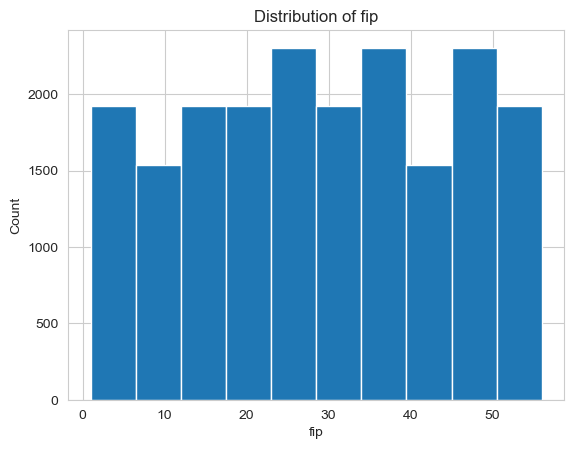

int64


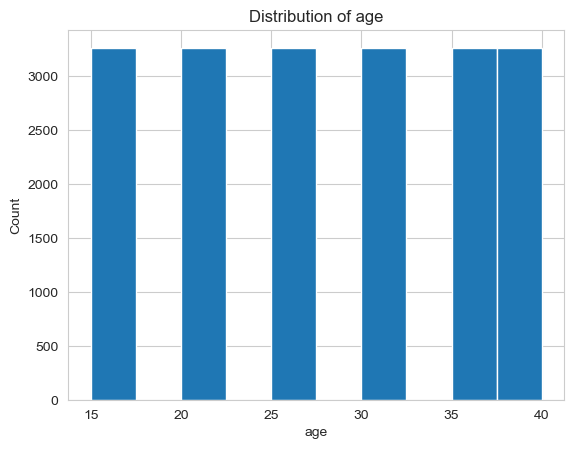

int8


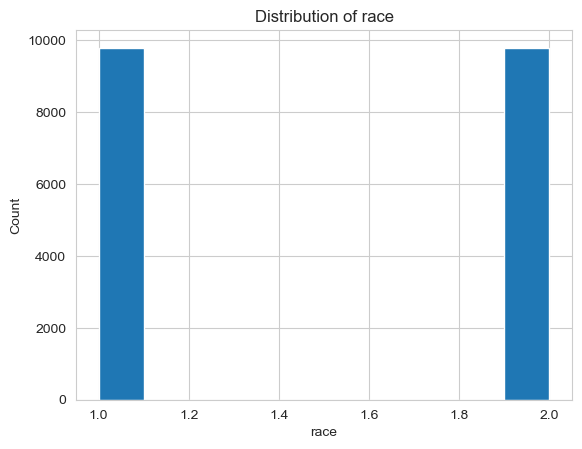

int16


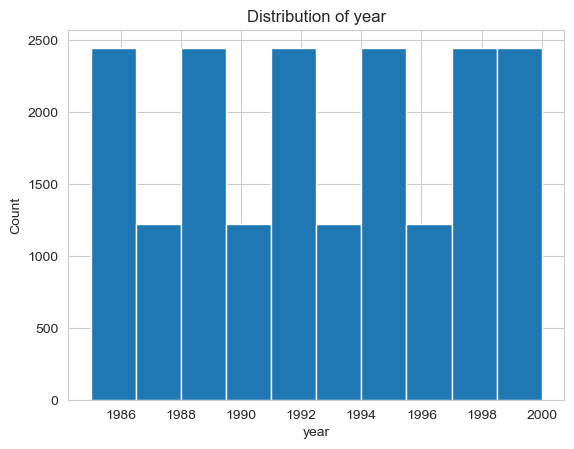

int8


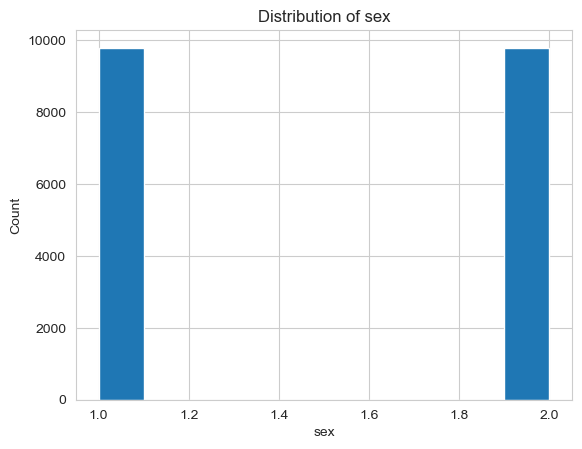

int32


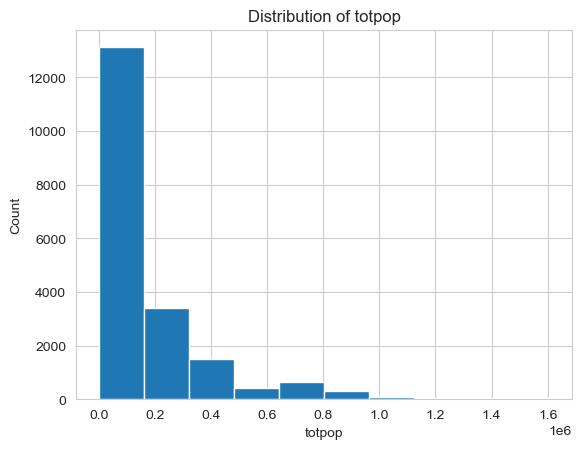

float32


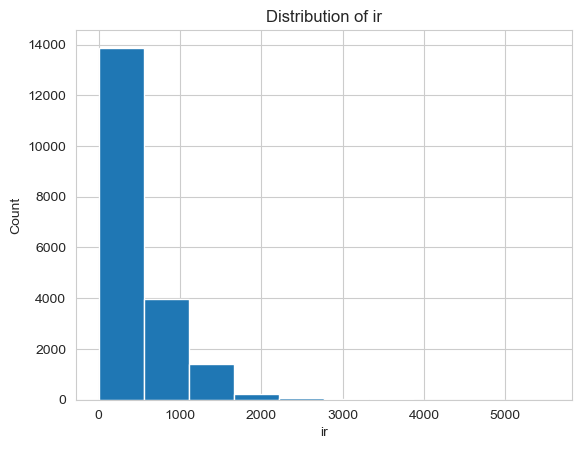

float32


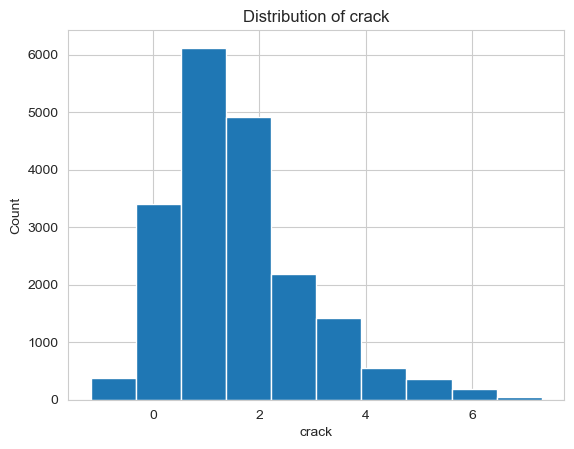

float32


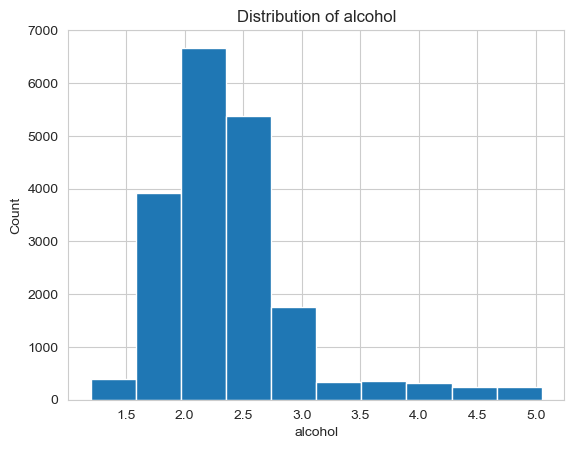

float32


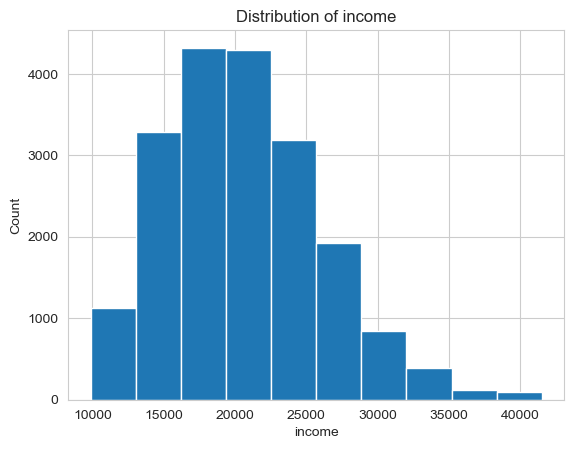

float32


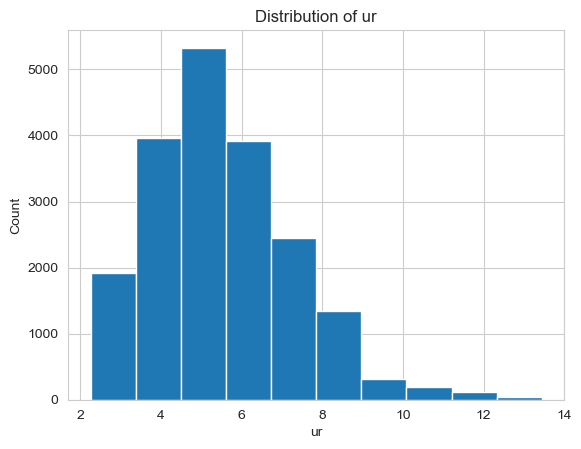

float32


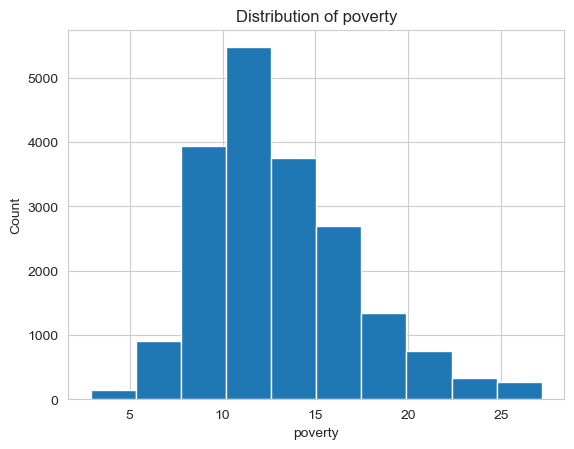

int8


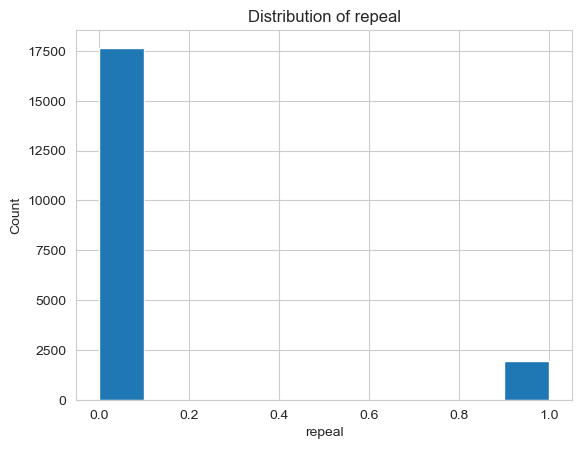

float32


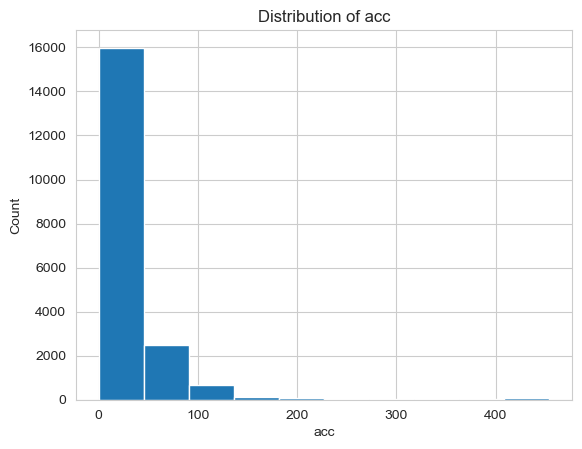

int8


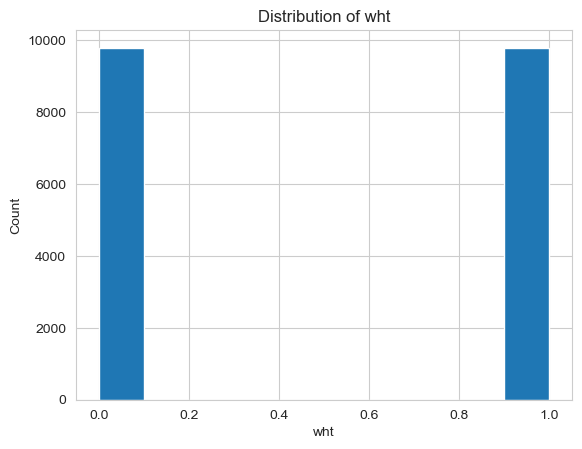

int8


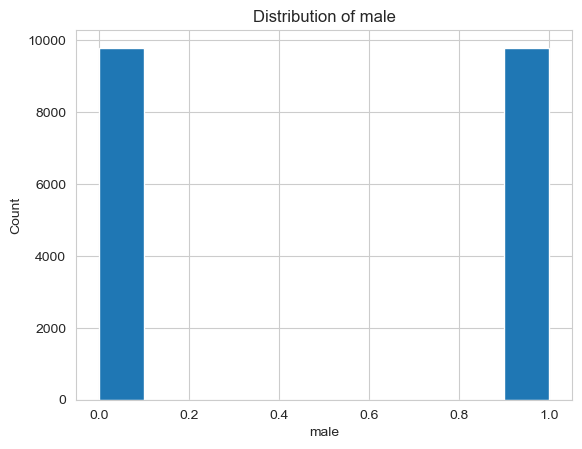

float32


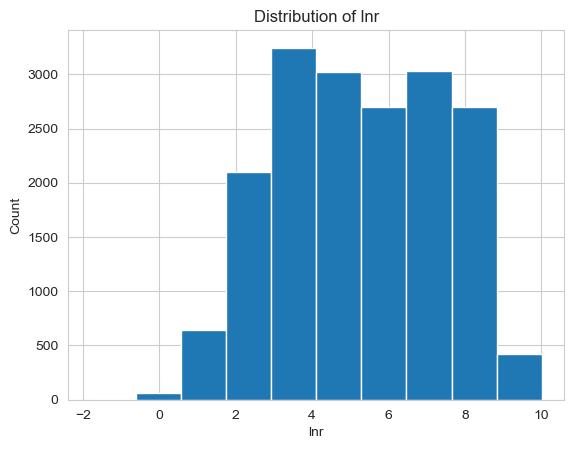

int8


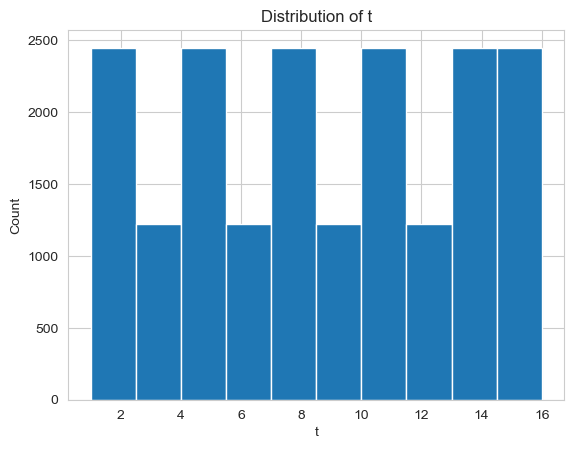

int8


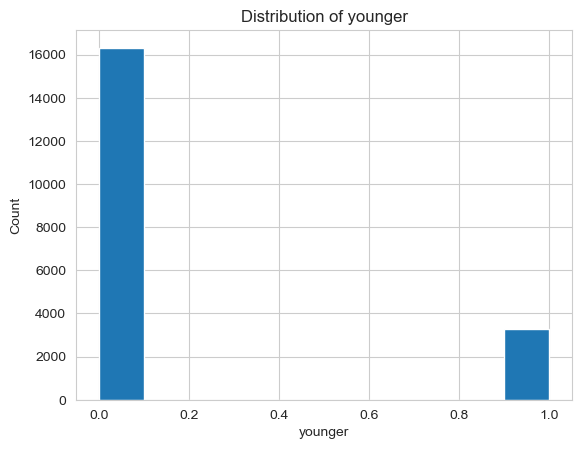

float64


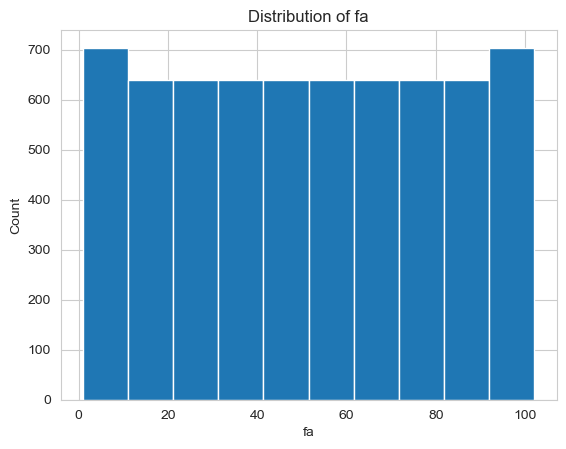

int8


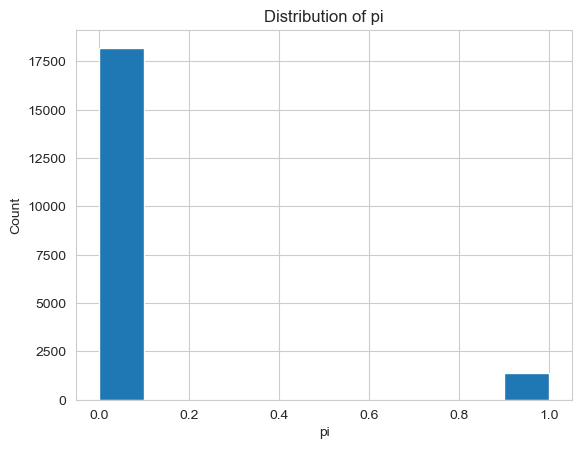

int8


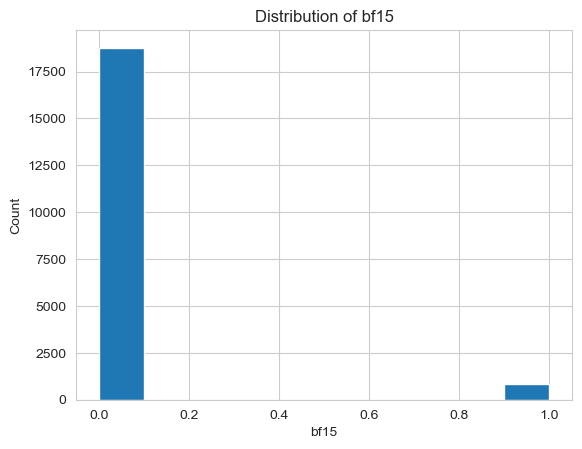

In [41]:
for col in df.columns:
    print(df[col].dtype)
    if df[col].dtype != 'category':
        plot_distribution(df, col) 

## Correlations in the Data

<Axes: >

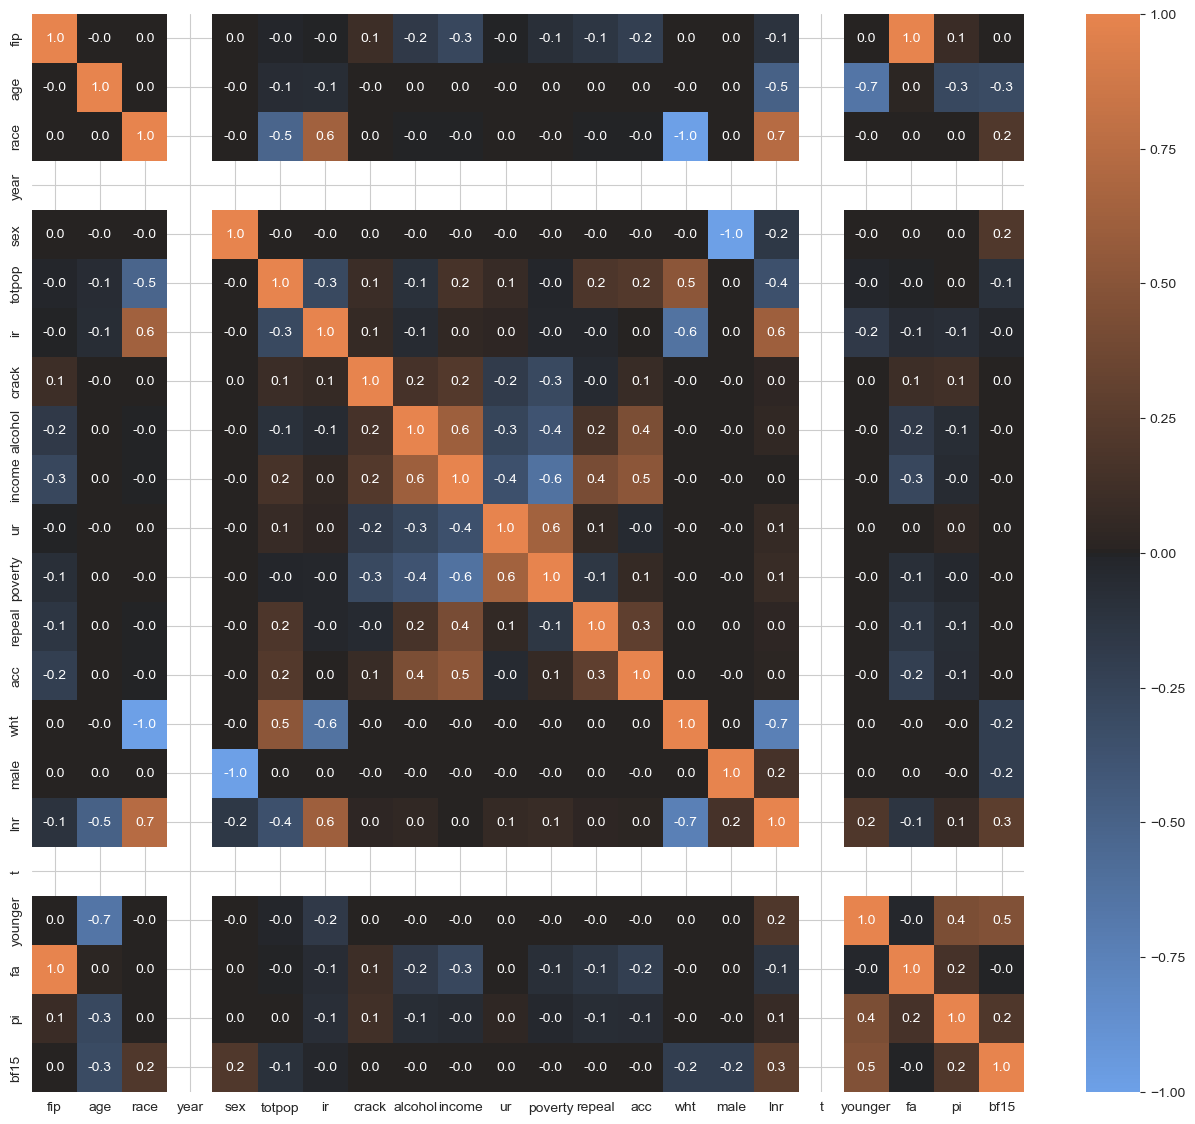

In [55]:
df_1985 = df[df['year']==1985]
corrs = df_1985.corr()

custom_cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corrs, annot=True, ax=ax, fmt = '.1f', cmap=custom_cmap)

In [56]:
def plot_corr(df, col1, col2, hue=None):
    sns.jointplot(data=df, x=col1, y=col2, hue=hue)

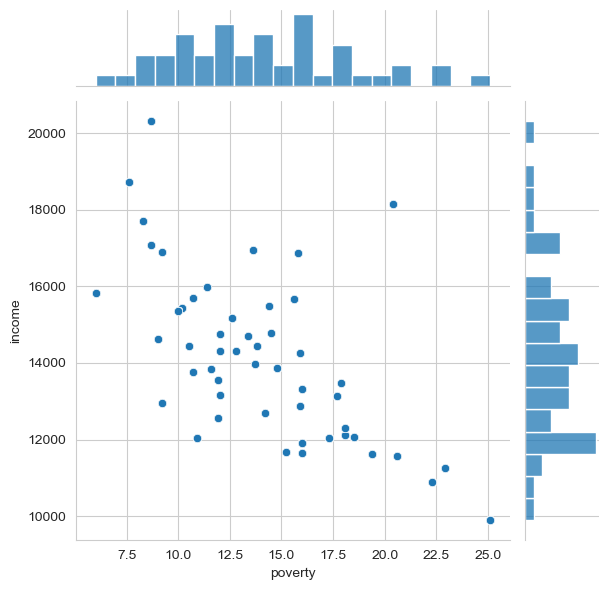

In [57]:

plot_corr(df_1985,'poverty', 'income')

In [11]:
def plot_dist(df, col, hue=None):
    sns.displot(data=df, x=col, hue=hue, multiple='stack', kind='kde')

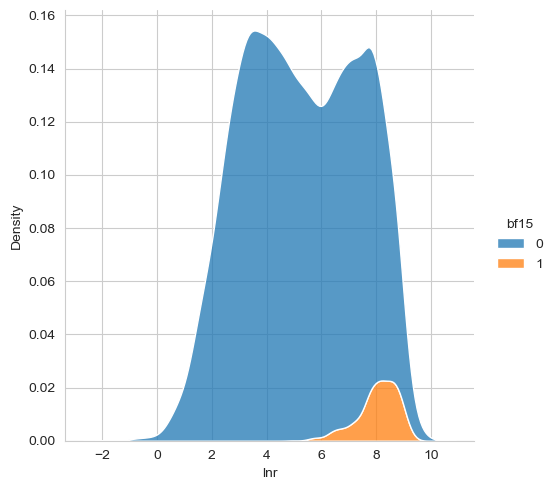

In [12]:
plot_dist(df,'lnr', hue='bf15')

In [13]:
# sns.pairplot(df, hue='race')

## Grouping By Year and State

In [14]:
fname = 'fips.csv'

fips_dict = pd.read_csv(fname, delimiter=',', header=None, index_col=0).to_dict()[1]

In [15]:
fips_dict

{1: 'ALABAMA',
 2: 'ALASKA',
 4: 'ARIZONA',
 5: 'ARKANSAS',
 6: 'CALIFORNIA',
 8: 'COLORADO',
 9: 'CONNECTICUT',
 10: 'DELAWARE',
 11: 'DISTRICT OF COLUMBIA',
 12: 'FLORIDA',
 13: 'GEORGIA',
 15: 'HAWAII',
 16: 'IDAHO',
 17: 'ILLINOIS',
 18: 'INDIANA',
 19: 'IOWA',
 20: 'KANSAS',
 21: 'KENTUCKY',
 22: 'LOUISIANA',
 23: 'MAINE',
 24: 'MARYLAND',
 25: 'MASSACHUSETTS',
 26: 'MICHIGAN',
 27: 'MINNESOTA',
 28: 'MISSISSIPPI',
 29: 'MISSOURI',
 30: 'MONTANA',
 31: 'NEBRASKA',
 32: 'NEVADA',
 33: 'NEW HAMPSHIRE',
 34: 'NEW JERSEY',
 35: 'NEW MEXICO',
 36: 'NEW YORK',
 37: 'NORTH CAROLINA',
 38: 'NORTH DAKOTA',
 39: 'OHIO',
 40: 'OKLAHOMA',
 41: 'OREGON',
 42: 'PENNSYLVANIA',
 44: 'RHODE ISLAND',
 45: 'SOUTH CAROLINA',
 46: 'SOUTH DAKOTA',
 47: 'TENNESSEE',
 48: 'TEXAS',
 49: 'UTAH',
 50: 'VERMONT',
 51: 'VIRGINIA',
 53: 'WASHINGTON',
 54: 'WEST VIRGINIA',
 55: 'WISCONSIN',
 56: 'WYOMING'}

In [16]:
df_state = df.groupby(['fip', 'year']).agg({'crack': 'mean',
                                  'alcohol':'mean',
                                  'income':'mean',
                                  'ur':'mean',
                                  'poverty':'mean',
                                  'repeal':'mean',
                                  'acc':'mean',
                                  'pi':'mean'
                                  }).reset_index()
df_state['fip'] = df_state['fip'].map(fips_dict)
df_state = df_state.rename(columns={'fip':'state'})


In [17]:
df_state.head()

state  year     crack  alcohol   income        ur    poverty  repeal  \
0  ALABAMA  1985  0.217438     1.90  11566.0  8.616667  20.600000     0.0   
1  ALABAMA  1986  0.276875     1.90  12164.0  9.083334  23.799997     0.0   
2  ALABAMA  1987  0.211371     1.89  12826.0  7.650000  21.299999     0.0   
3  ALABAMA  1988  0.559781     1.89  13698.0  6.916667  19.299999     0.0   
4  ALABAMA  1989  0.721824     1.87  14865.0  6.616667  18.900000     0.0   

        acc        pi  
0  0.679504  0.000000  
1  1.531196  0.000000  
2  3.498410  0.166667  
3  6.256546  0.166667  
4  9.422949  0.166667

In [18]:
def plot_time_series(df, col, state):
    df = df[df['state'] == state]
    sns.lineplot(data=df, y=col, x='year')
    plt.title(f'{col} over time in {state}')

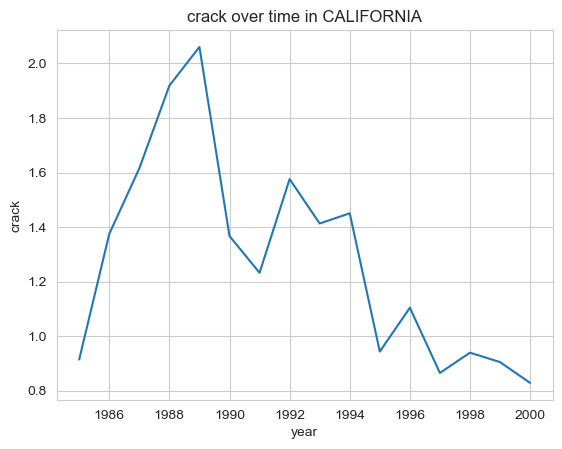

In [19]:
plot_time_series(df_state, 'crack', 'CALIFORNIA')

## Plotting US Maps


In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import os

In [21]:
gdf = gpd.read_file('cb_2018_us_state_500k')

In [22]:
gdf

STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
0       28  01779790  0400000US28    28     MS   
1       37  01027616  0400000US37    37     NC   
2       40  01102857  0400000US40    40     OK   
3       51  01779803  0400000US51    51     VA   
4       54  01779805  0400000US54    54     WV   
5       22  01629543  0400000US22    22     LA   
6       26  01779789  0400000US26    26     MI   
7       25  00606926  0400000US25    25     MA   
8       16  01779783  0400000US16    16     ID   
9       12  00294478  0400000US12    12     FL   
10      31  01779792  0400000US31    31     NE   
11      53  01779804  0400000US53    53     WA   
12      35  00897535  0400000US35    35     NM   
13      72  01779808  0400000US72    72     PR   
14      46  01785534  0400000US46    46     SD   
15      48  01779801  0400000US48    48     TX   
16      06  01779778  0400000US06    06     CA   
17      01  01779775  0400000US01    01     AL   
18      13  01705317  0400000US13    13     GA   
19      42  01779798  0400000US42    42     PA   
20      29  01779791  0400000US29    29     MO   
21      08  01779779  0400000US08    08     CO   
22      49  01455989  0400000US49    49     UT   
23      47  01325873  0400000US47    47     TN   
24      56  01779807  0400000US56    56     WY   
25      36  01779796  0400000US36    36     NY   
26      20  00481813  0400000US20    20     KS   
27      02  01785533  0400000US02    02     AK   
28      32  01779793  0400000US32    32     NV   
29      17  01779784  0400000US17    17     IL   
30      50  01779802  0400000US50    50     VT   
31      30  00767982  0400000US30    30     MT   
32      19  01779785  0400000US19    19     IA   
33      45  01779799  0400000US45    45     SC   
34      33  01779794  0400000US33    33     NH   
35      04  01779777  0400000US04    04     AZ   
36      11  01702382  0400000US11    11     DC   
37      60  01802701  0400000US60    60     AS   
38      78  01802710  0400000US78    78     VI   
39      34  01779795  0400000US34    34     NJ   
40      24  01714934  0400000US24    24     MD   
41      23  01779787  0400000US23    23     ME   
42      15  01779782  0400000US15    15     HI   
43      10  01779781  0400000US10    10     DE   
44      66  01802705  0400000US66    66     GU   
45      69  01779809  0400000US69    69     MP   
46      44  01219835  0400000US44    44     RI   
47      21  01779786  0400000US21    21     KY   
48      39  01085497  0400000US39    39     OH   
49      55  01779806  0400000US55    55     WI   
50      41  01155107  0400000US41    41     OR   
51      38  01779797  0400000US38    38     ND   
52      05  00068085  0400000US05    05     AR   
53      18  00448508  0400000US18    18     IN   
54      27  00662849  0400000US27    27     MN   
55      09  01779780  0400000US09    09     CT   

                                            NAME LSAD          ALAND  \
0                                    Mississippi   00   121533519481   
1                                 North Carolina   00   125923656064   
2                                       Oklahoma   00   177662925723   
3                                       Virginia   00   102257717110   
4                                  West Virginia   00    62266474513   
5                                      Louisiana   00   111897594374   
6                                       Michigan   00   146600952990   
7                                  Massachusetts   00    20205125364   
8                                          Idaho   00   214049787659   
9                                        Florida   00   138949136250   
10                                      Nebraska   00   198956658395   
11                                    Washington   00   172112588220   
12                                    New Mexico   00   314196306401   
13                                   Puerto Rico   00     8868896030   
14                                  South Dakota   00   196346981786   


In [23]:
gdf['NAME'] = gdf['NAME'].str.upper()

In [24]:
gdf_state = gdf.merge(df_state, left_on='NAME', right_on='state')
gdf_state

STATEFP   STATENS     AFFGEOID GEOID STUSPS         NAME LSAD  \
0        28  01779790  0400000US28    28     MS  MISSISSIPPI   00   
1        28  01779790  0400000US28    28     MS  MISSISSIPPI   00   
2        28  01779790  0400000US28    28     MS  MISSISSIPPI   00   
3        28  01779790  0400000US28    28     MS  MISSISSIPPI   00   
4        28  01779790  0400000US28    28     MS  MISSISSIPPI   00   
..      ...       ...          ...   ...    ...          ...  ...   
811      09  01779780  0400000US09    09     CT  CONNECTICUT   00   
812      09  01779780  0400000US09    09     CT  CONNECTICUT   00   
813      09  01779780  0400000US09    09     CT  CONNECTICUT   00   
814      09  01779780  0400000US09    09     CT  CONNECTICUT   00   
815      09  01779780  0400000US09    09     CT  CONNECTICUT   00   

            ALAND      AWATER  \
0    121533519481  3926919758   
1    121533519481  3926919758   
2    121533519481  3926919758   
3    121533519481  3926919758   
4    121533519481  3926919758   
..            ...         ...   
811   12542497068  1815617571   
812   12542497068  1815617571   
813   12542497068  1815617571   
814   12542497068  1815617571   
815   12542497068  1815617571   

                                              geometry        state  year  \
0    MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  MISSISSIPPI  1985   
1    MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  MISSISSIPPI  1986   
2    MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  MISSISSIPPI  1987   
3    MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  MISSISSIPPI  1988   
4    MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  MISSISSIPPI  1989   
..                                                 ...          ...   ...   
811  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...  CONNECTICUT  1996   
812  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...  CONNECTICUT  1997   
813  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...  CONNECTICUT  1998   
814  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...  CONNECTICUT  1999   
815  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...  CONNECTICUT  2000   

        crack  alcohol   income         ur    poverty  repeal        acc  \
0    0.018633     2.04   9892.0  10.783333  25.100000     0.0   0.386283   
1    0.256577     2.04  10194.0  12.083333  26.600000     0.0   1.542804   
2    0.437705     2.01  10802.0  10.433333  25.000000     0.0   3.667247   
3    0.378810     2.03  11561.0   8.725000  27.200003     0.0   7.232071   
4    0.660209     2.00  12495.0   8.041667  22.000000     0.0  11.818024   
..        ...      ...      ...        ...        ...     ...        ...   
811  5.369555     2.13  32424.0   5.316667  11.700000     0.0  79.405045   
812  3.724335     2.17  34375.0   4.833333   8.600000     0.0  68.304924   
813  4.198919     2.18  36822.0   3.266667   9.500000     0.0  55.460545   
814  4.808353     2.18  38332.0   2.650000   7.199999     0.0  39.121407   
815  2.371063     2.18  41489.0   2.258333   7.699999     0.0  29.502167   

           pi  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
..        ...  
811  0.166667  
812  0.166667  
813  0.166667  
814  0.166667  
815  0.166667  

[816 rows x 20 columns]

In [25]:
# Apply this the gdf to ensure that all states are assigned colors by the same function
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

In [26]:
def plot_map(gdf, variable, fig_title, cbar_title, vmin, vmax, fig_name, save=False, cbar_percent=False, figsize=(18, 14), colormap="YlOrBr"):
    # **************************
    # set the value column that will be visualised

    # make a column for value_determined_color in gdf
    # set the range for the choropleth values with the upper bound the rounded up maximum value
     #math.ceil(gdf.pct_food_insecure.max())
    # Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
    gdf = makeColorColumn(gdf,variable,vmin,vmax)
    
    # create "visframe" as a re-projected gdf using EPSG 2163
    visframe = gdf.to_crs(epsg=2163)
    
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=figsize)
    # remove the axis box around the vis
    ax.axis('off')
    
    # set the font for the visualization to Helvetica
    hfont = {'fontname':'Helvetica'}
    
    # add a title and annotation
    ax.set_title(fig_title, **hfont, fontdict={'fontsize': '42', 'fontweight' : '1'})
    
    # Create colorbar legend
    fig = ax.get_figure()
    cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   
    cbax.set_title(cbar_title, **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})
    
    # add color scale
    sm = plt.cm.ScalarMappable(cmap=colormap, \
                     norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # reformat tick labels on legend
    sm._A = []
    if cbar_percent:
        comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
        fig.colorbar(sm, cax=cbax, format=comma_fmt)
    else:
        fig.colorbar(sm, cax=cbax)
    tick_font_size = 16
    cbax.tick_params(labelsize=tick_font_size)
    ax.annotate("Data: Abortion dataset from \nhttps://github.com/NickCH-K/causaldata/tree/main/Python/causaldata", xy=(0.22, .085), xycoords='figure fraction', fontsize=12, color='#555555')
    
    
    # create map
    # Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
    for row in visframe.itertuples():
        if row.STUSPS not in ['AK','HI']:
            vf = visframe[visframe.STUSPS==row.STUSPS]
            c = gdf[gdf.STUSPS==row.STUSPS][0:1].value_determined_color.item()
            vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')
    
    
    # add Alaska
    akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
    akax.axis('off')
    # polygon to clip western islands
    polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
    alaska_gdf = gdf[gdf.STUSPS=='AK']
    alaska_gdf.clip(polygon).plot(color=gdf[gdf.STUSPS=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')
    
    
    # add Hawaii
    hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
    hiax.axis('off')
    # polygon to clip western islands
    hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
    hawaii_gdf = gdf[gdf.STUSPS=='HI']
    hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')
    
    
    
    if save:
        # check if fig_name dir exists, if not create it
        if not os.path.exists(os.path.dirname(fig_name)):
            os.makedirs(os.path.dirname(fig_name))
        fig.savefig(fig_name, dpi=400, bbox_inches="tight")

    # bbox_inches="tight" keeps the vis from getting cut off at the edges in the saved png
    # dip is "dots per inch" and controls image quality.  Many scientific journals have specifications for this
    # https://stackoverflow.com/questions/16183462/saving-images-in-python-at-a-very-high-quality

/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/sl/lr3h2xdj455ctqq6vn1834000000gn/T/ipykernel_28064/3670548663.py:69: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

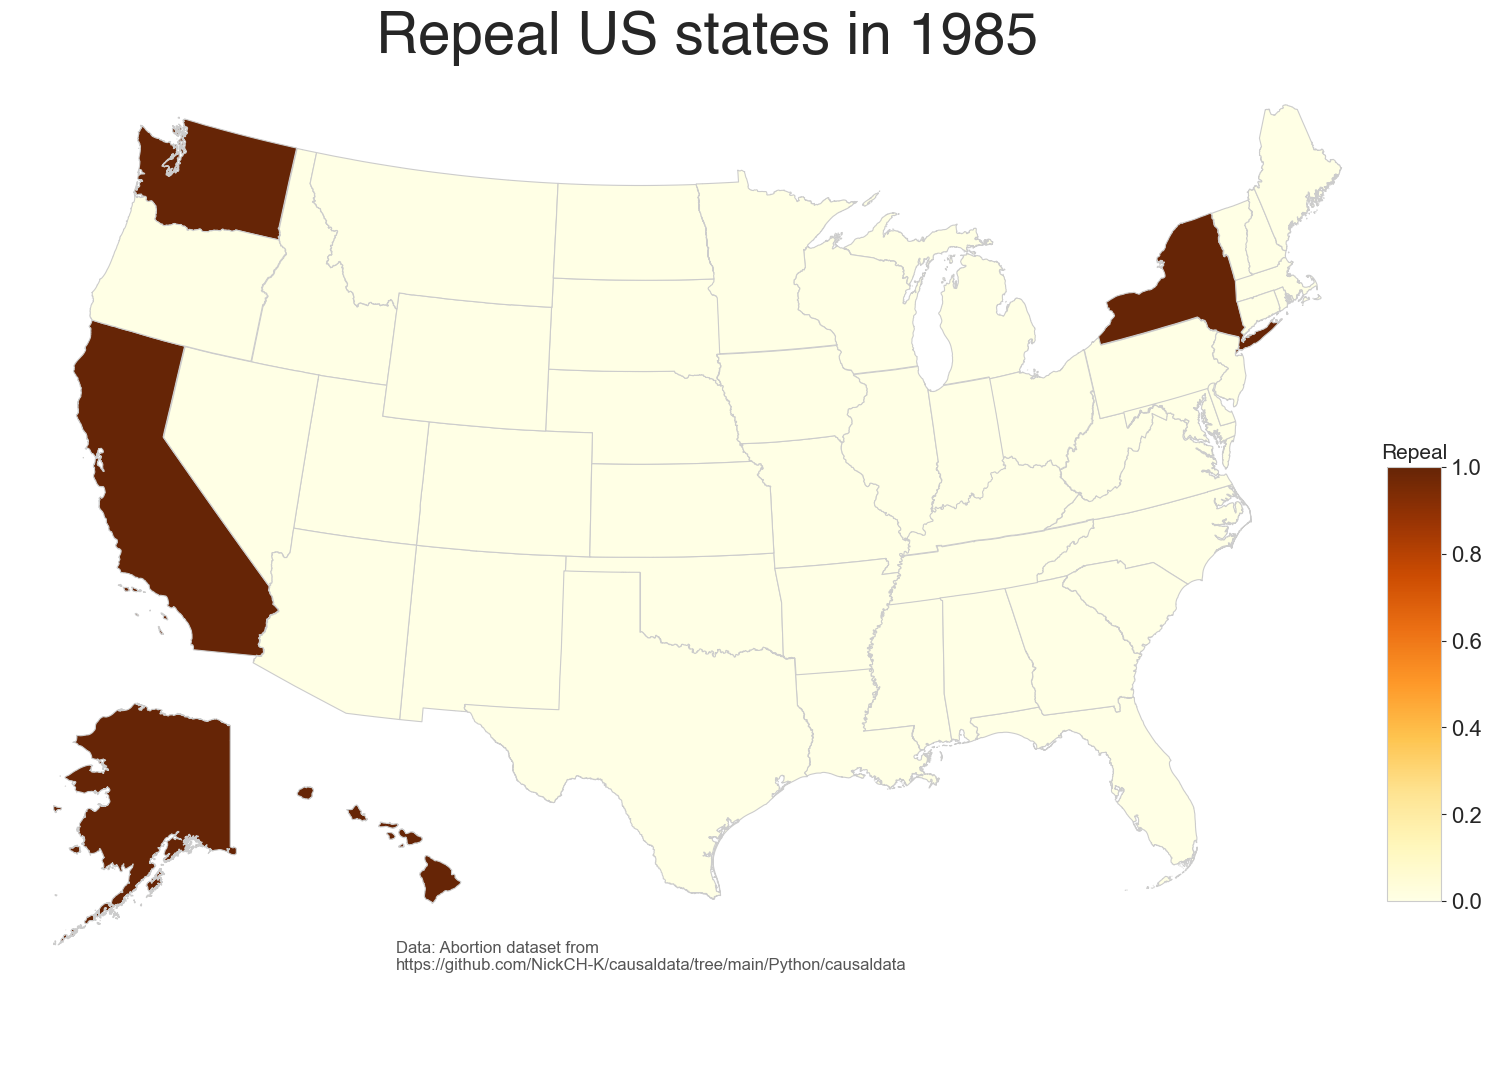

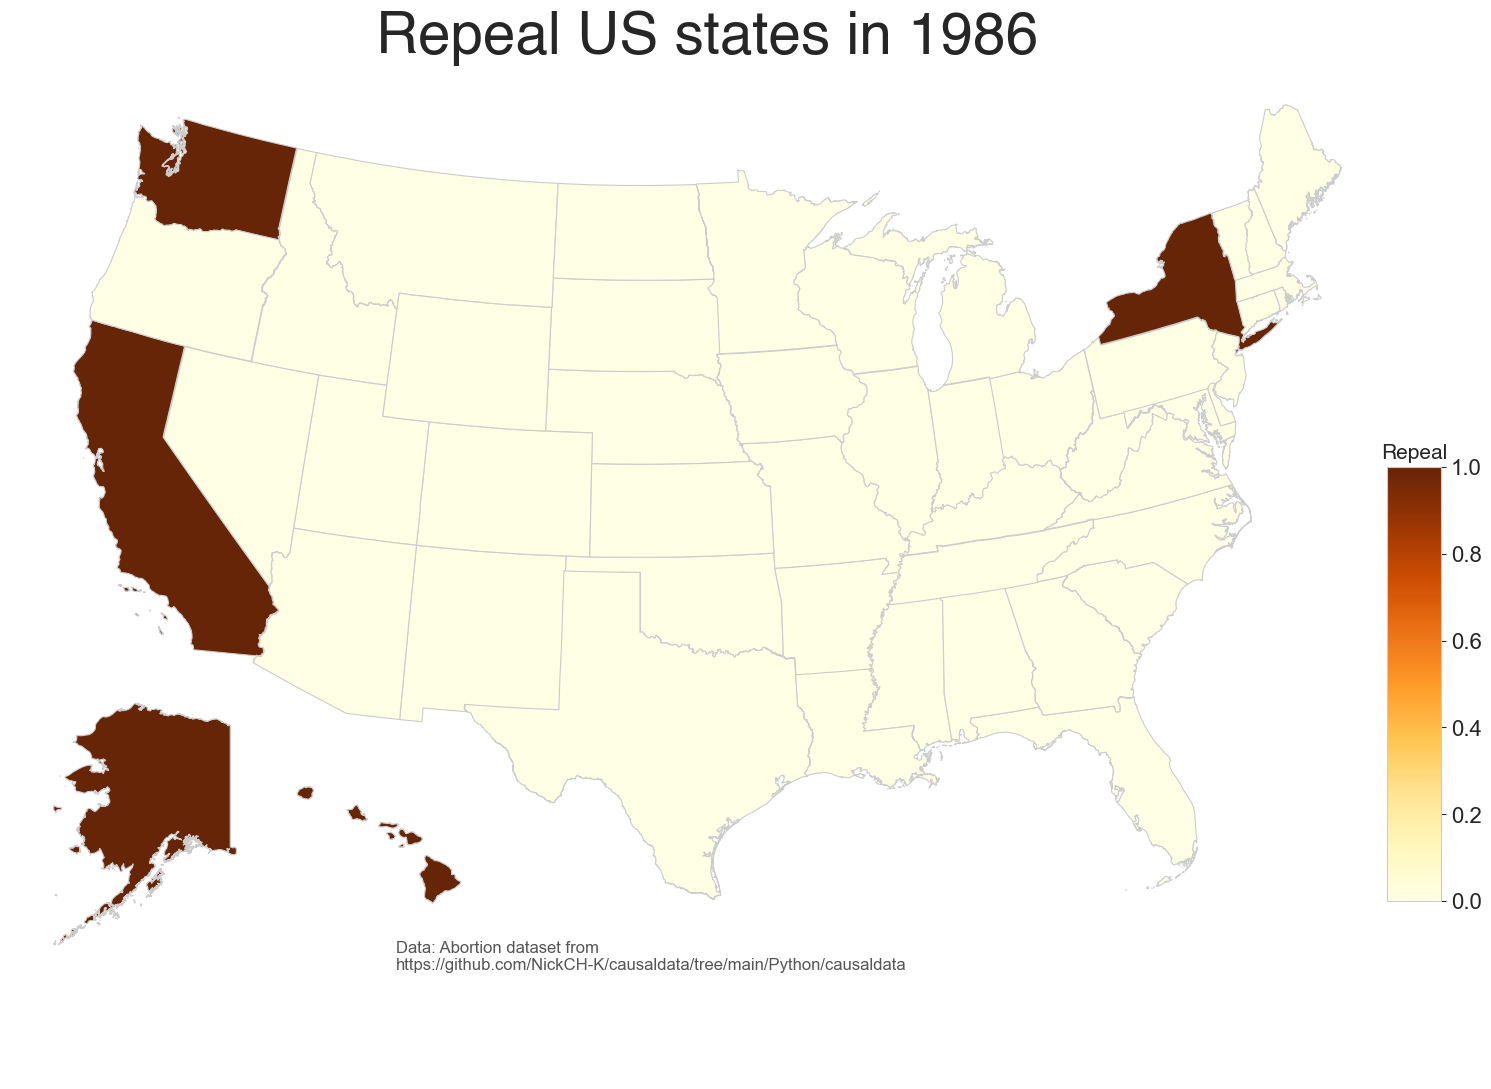

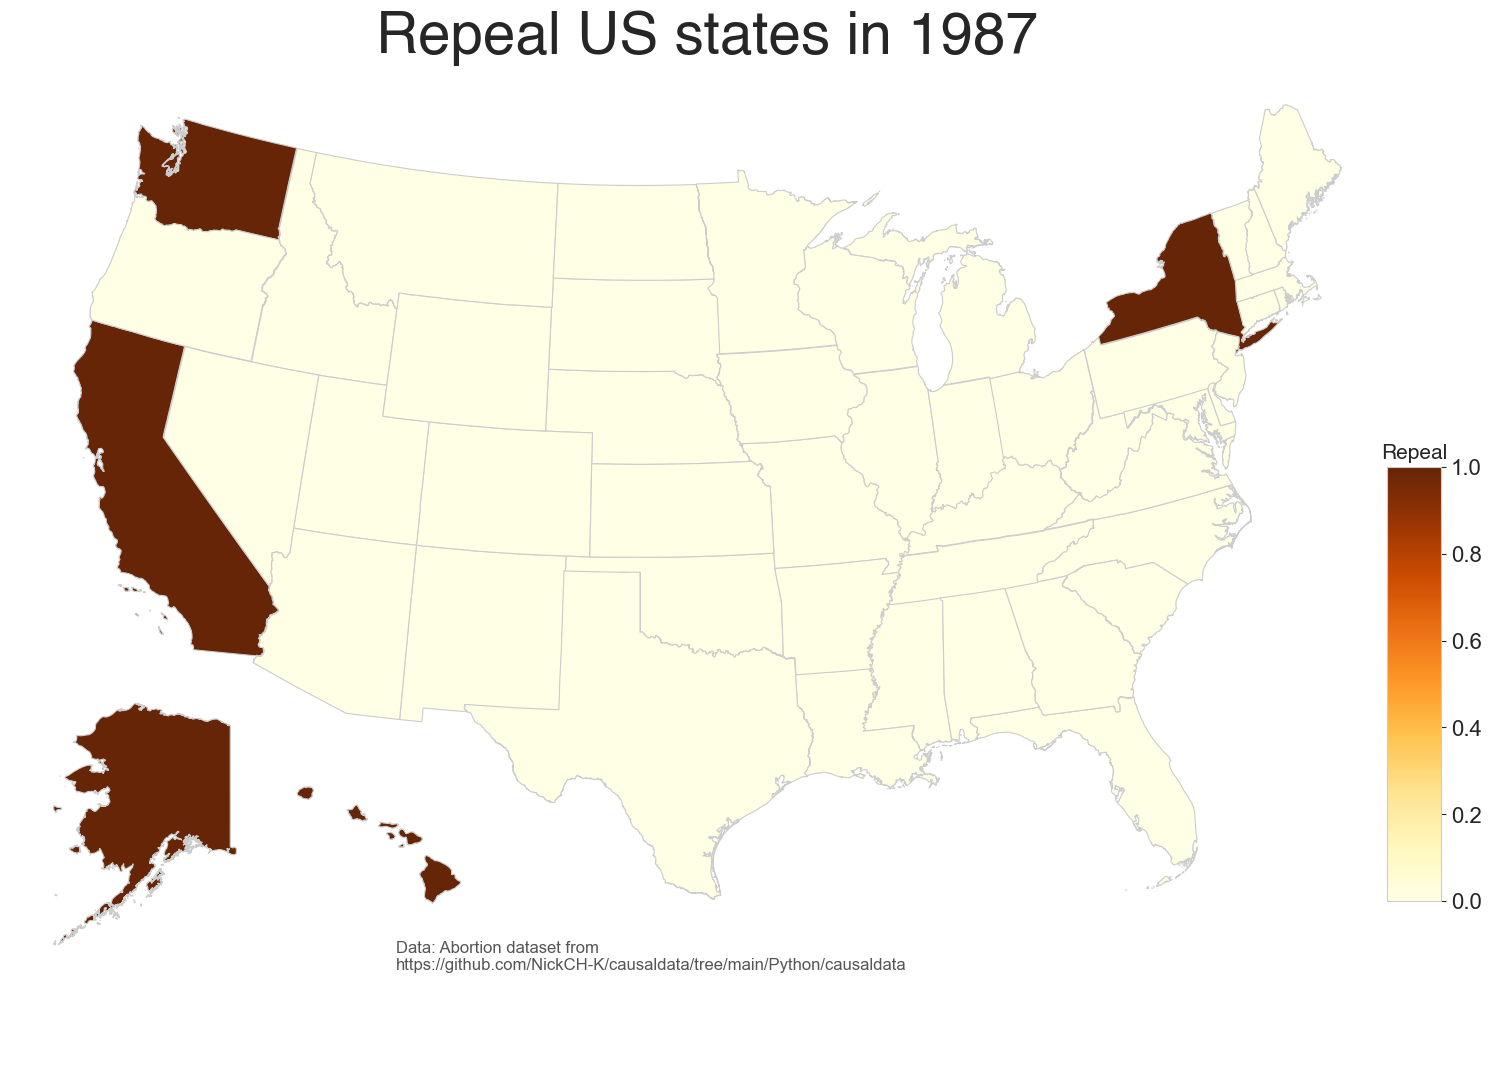

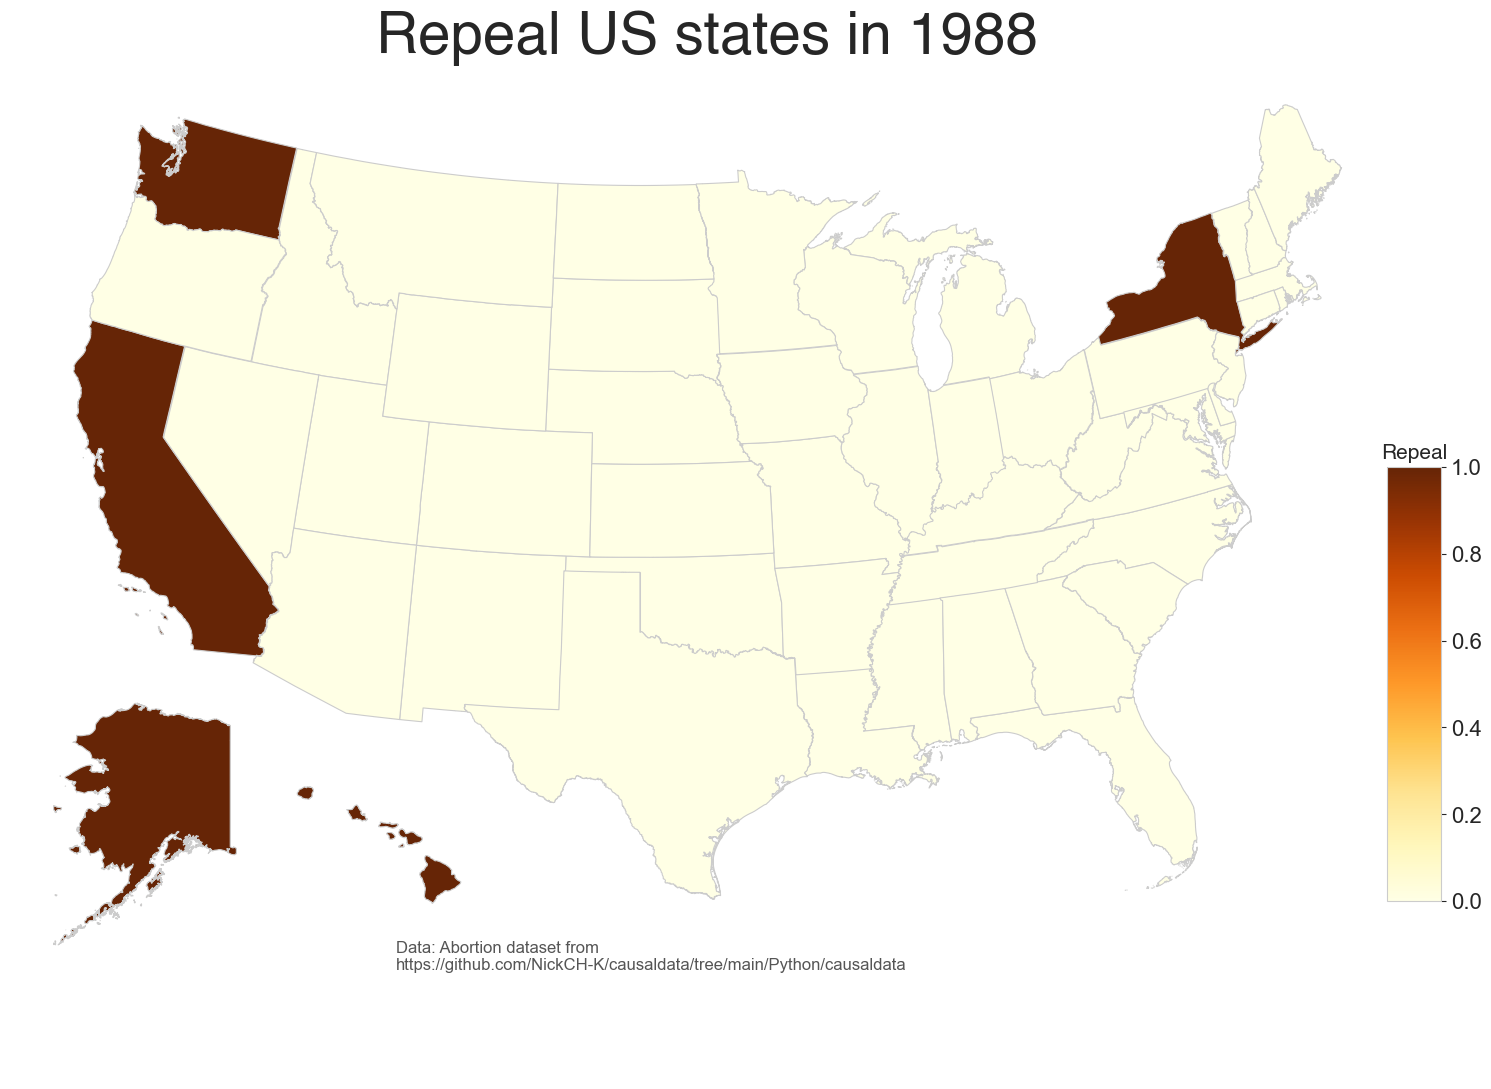

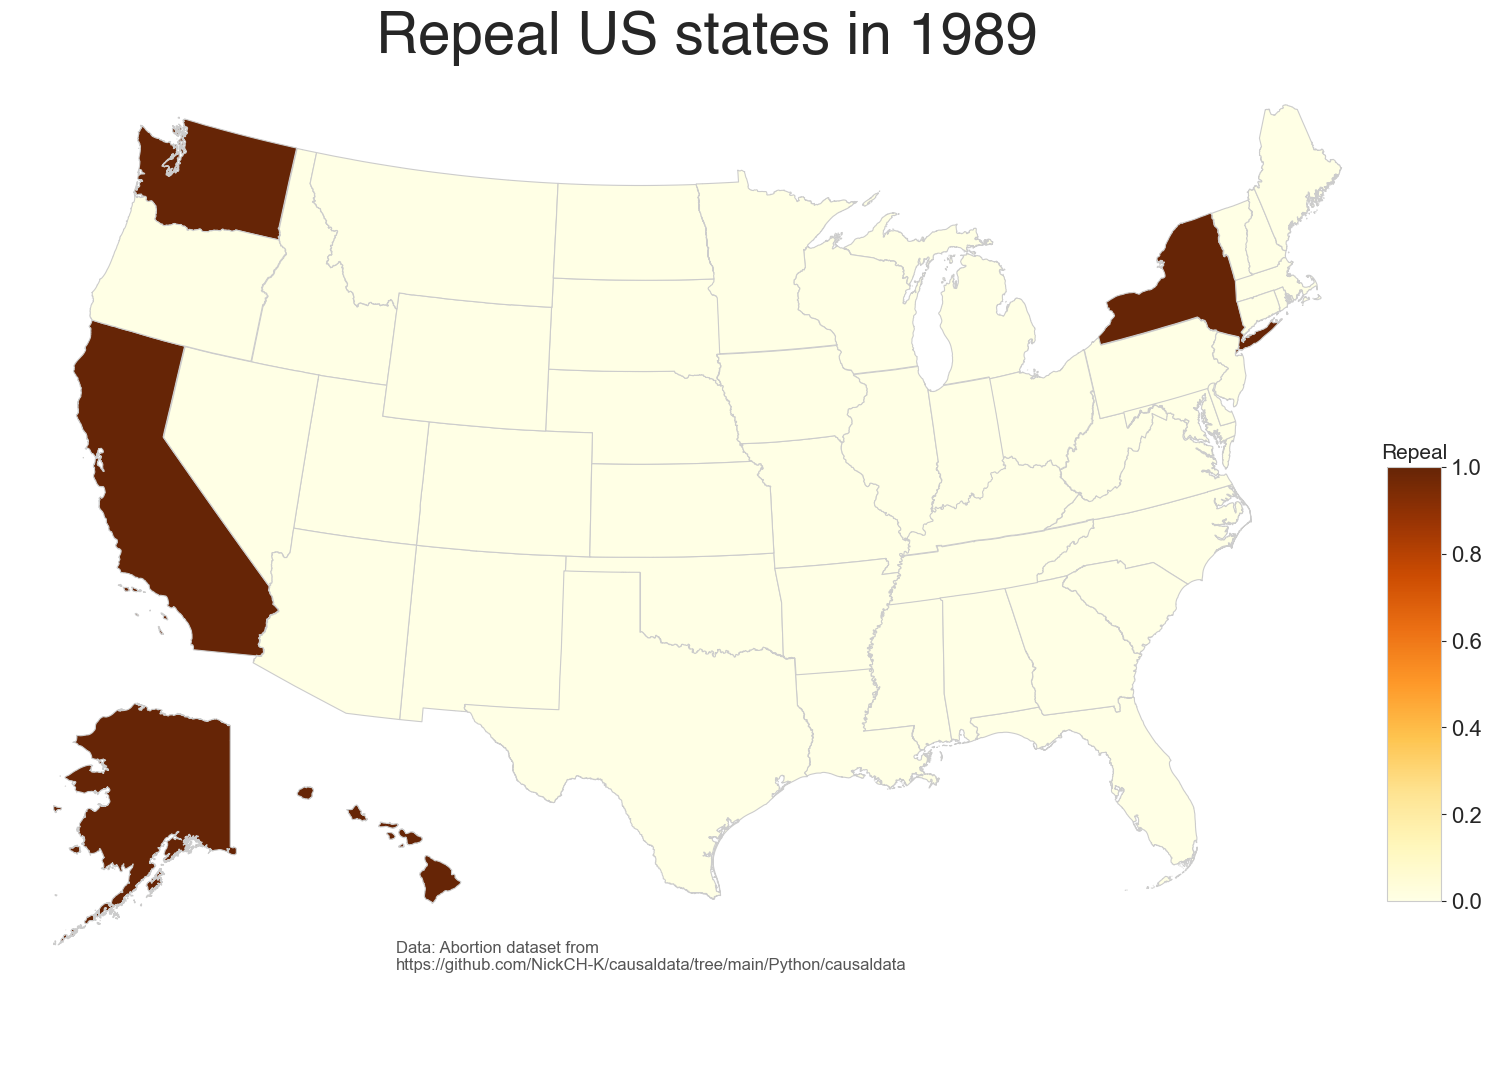

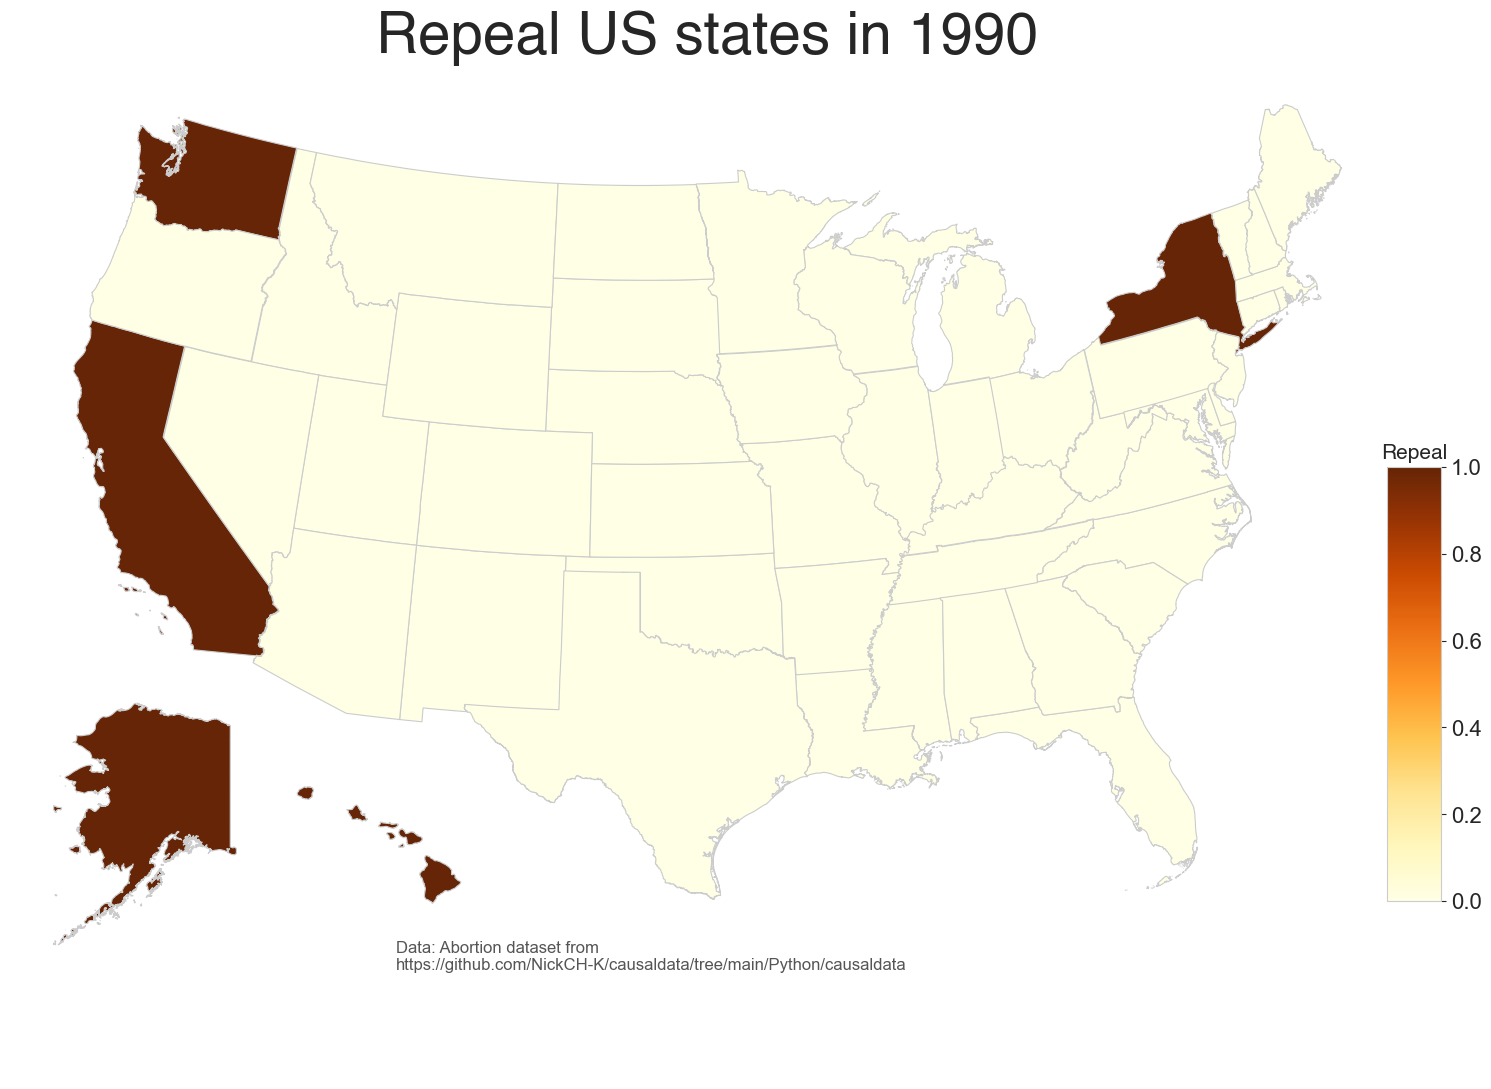

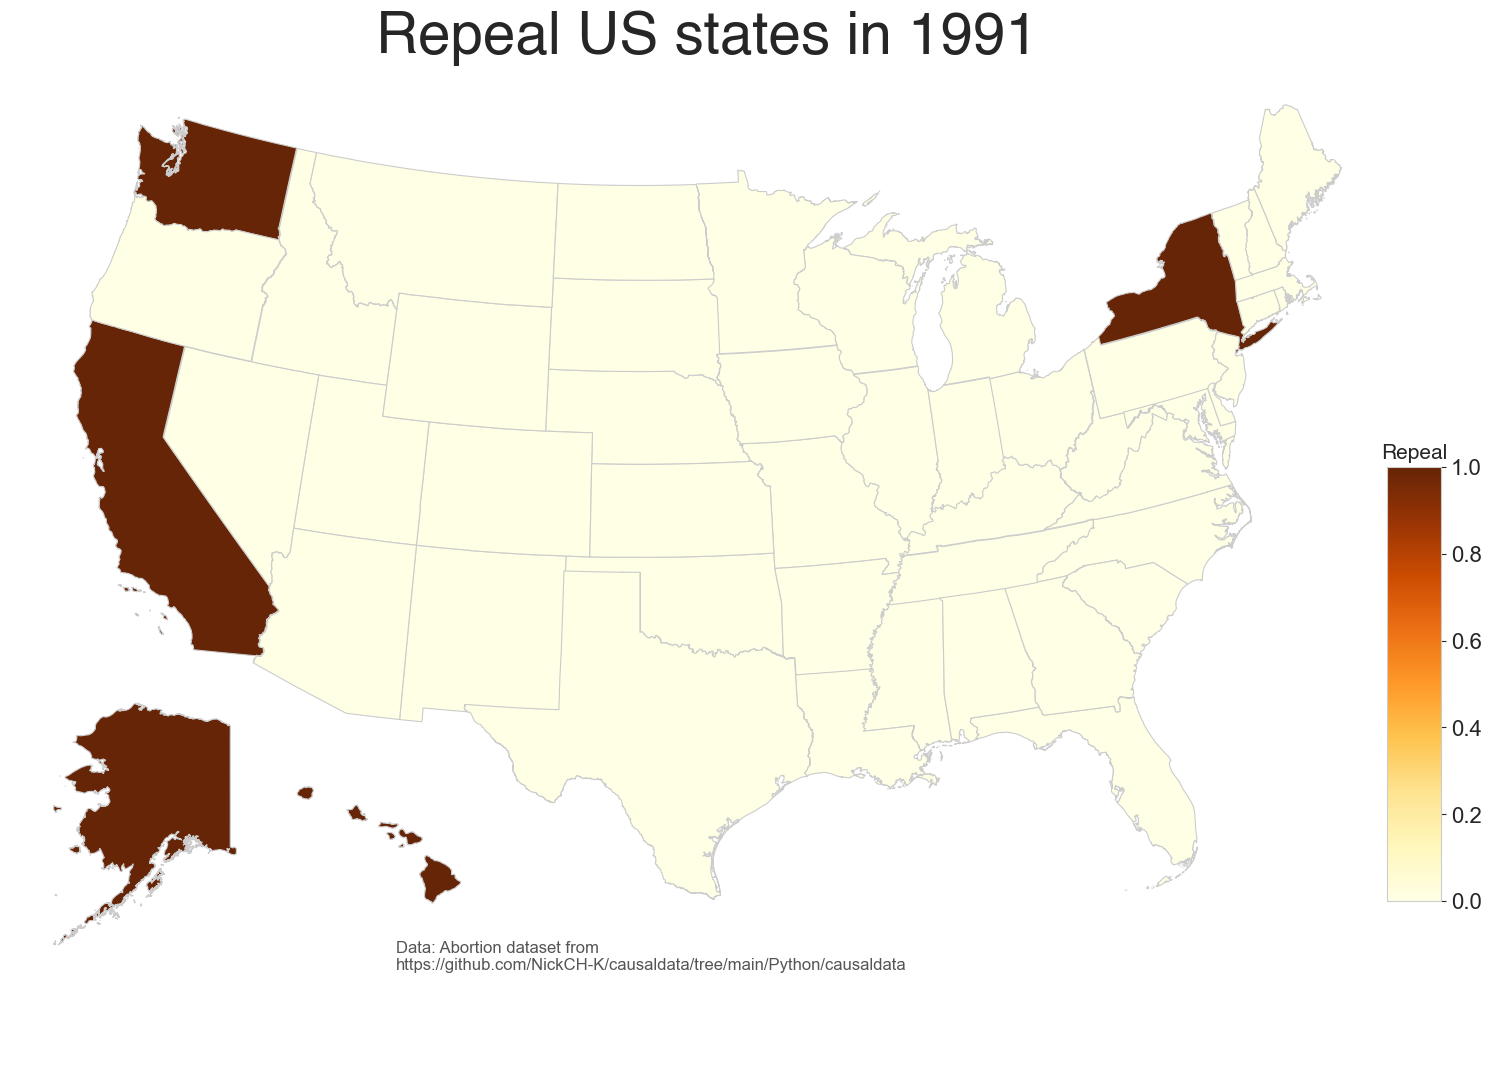

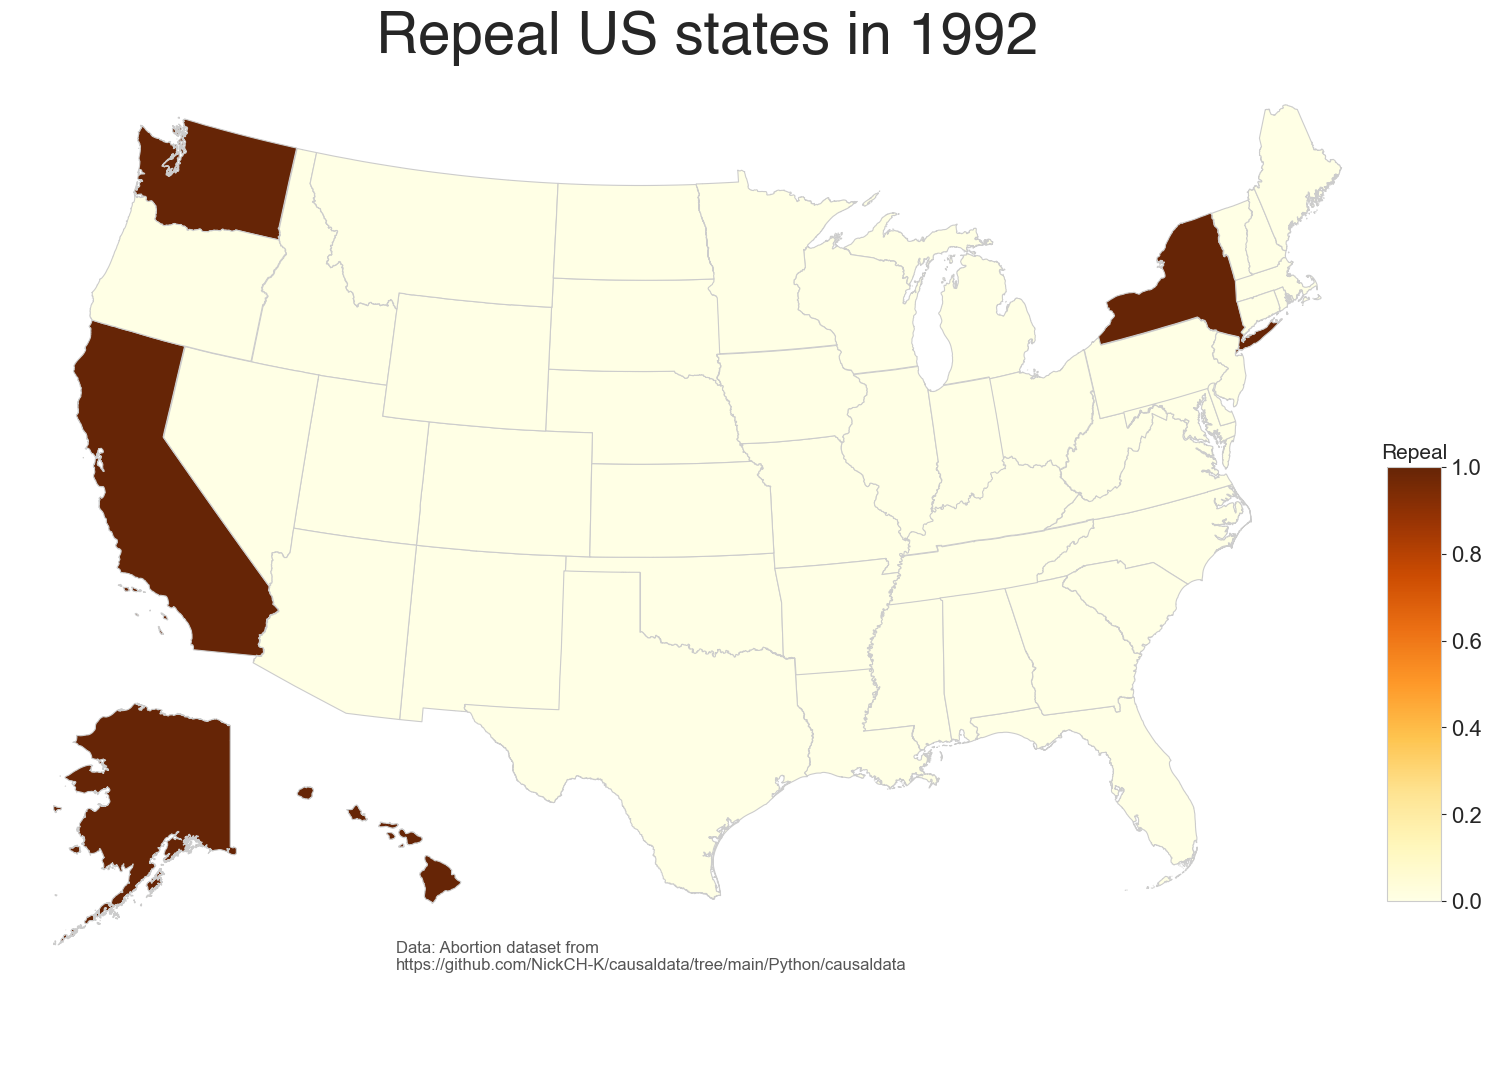

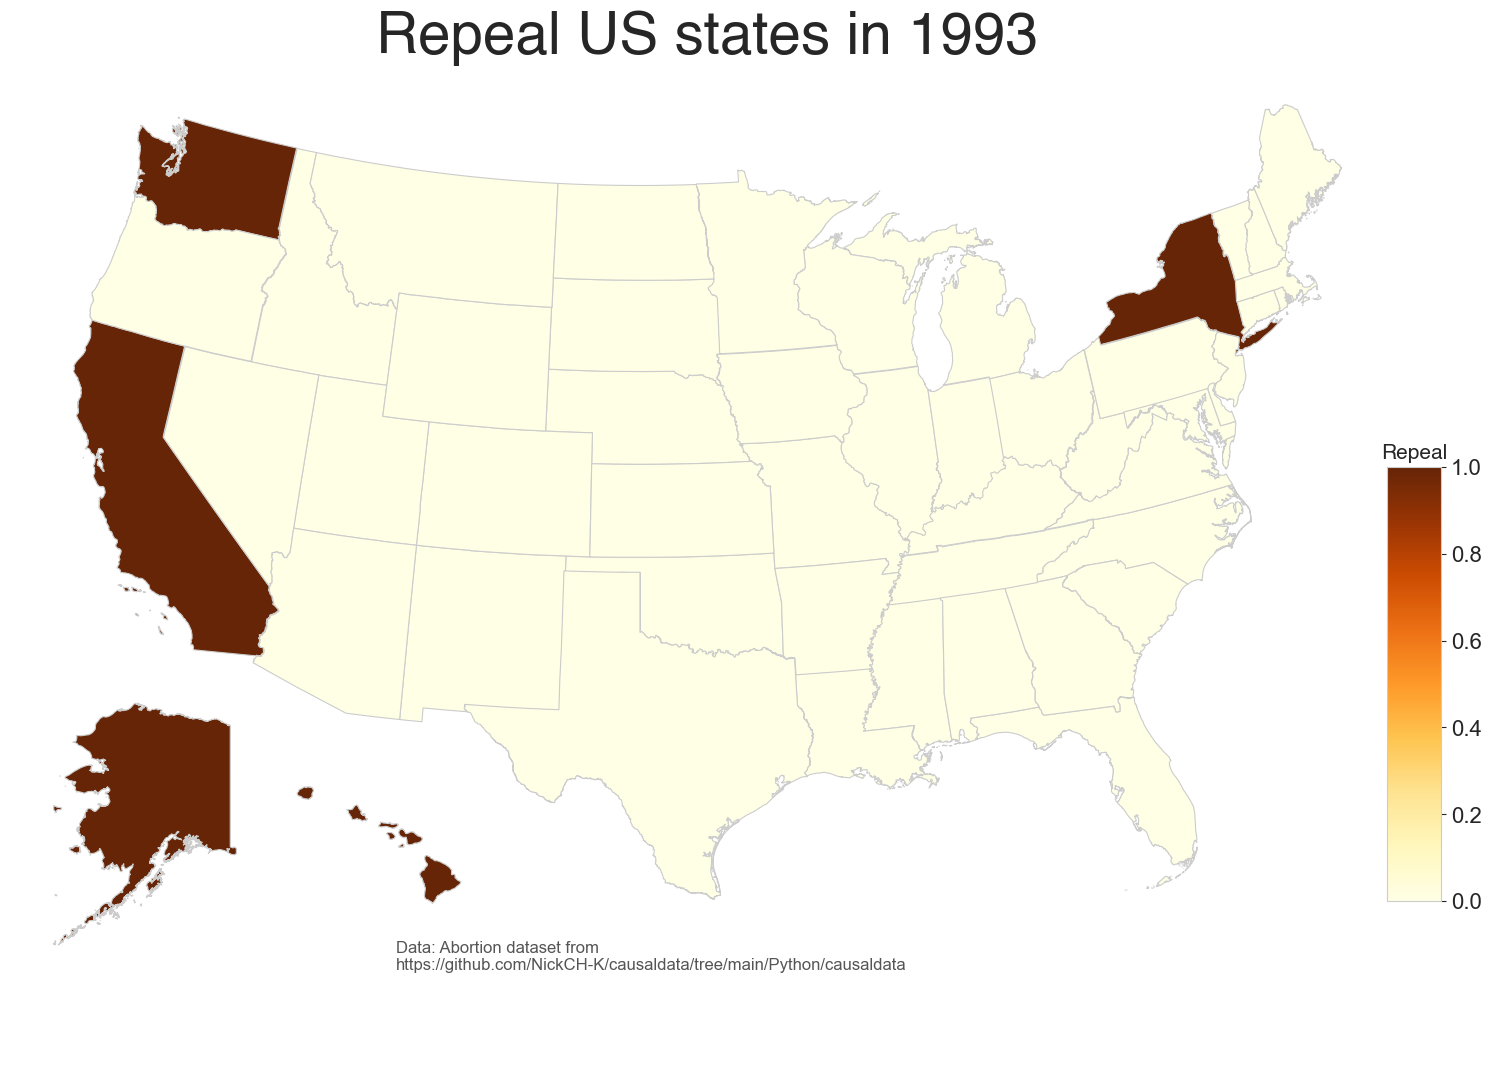

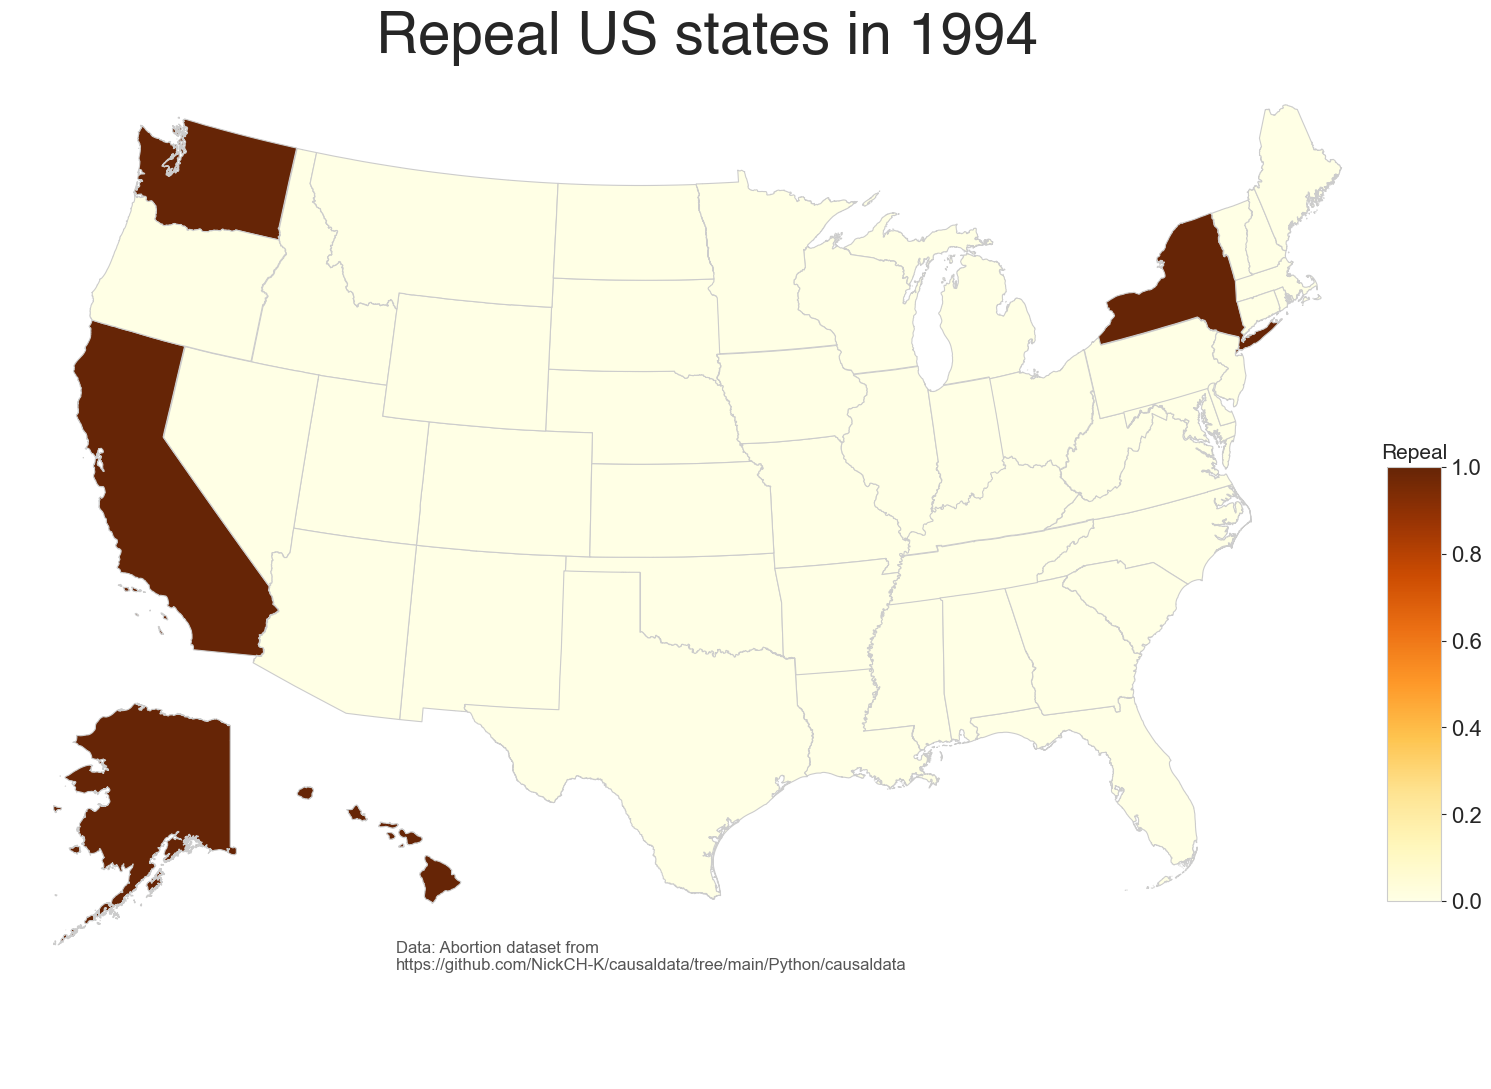

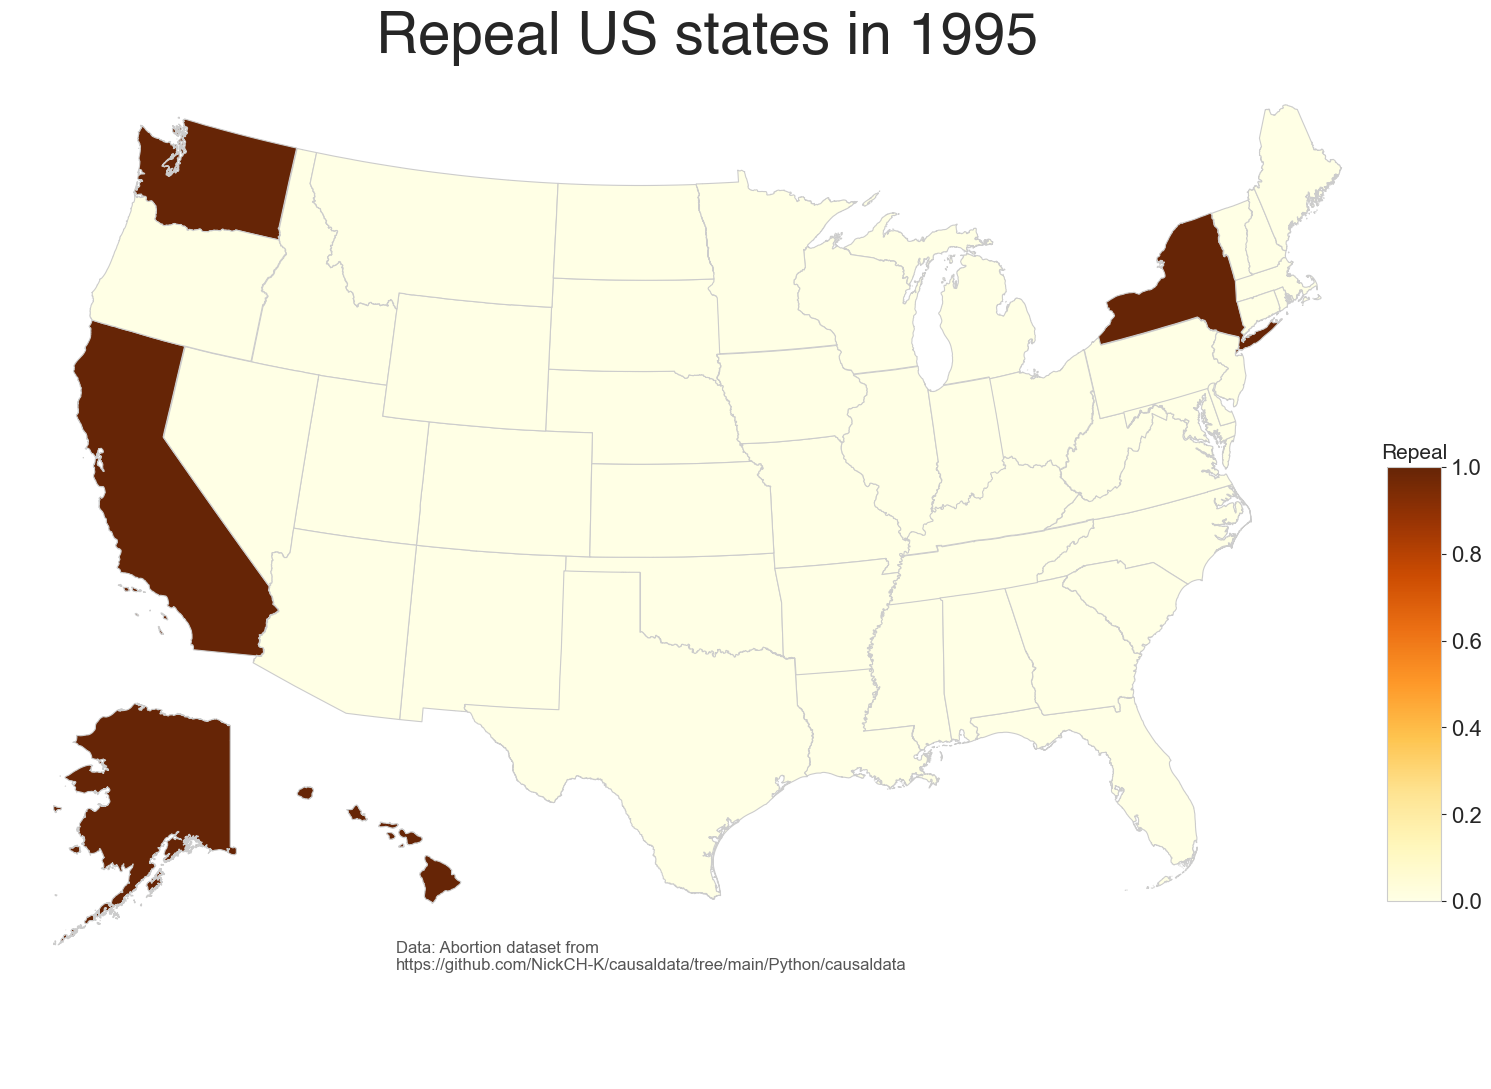

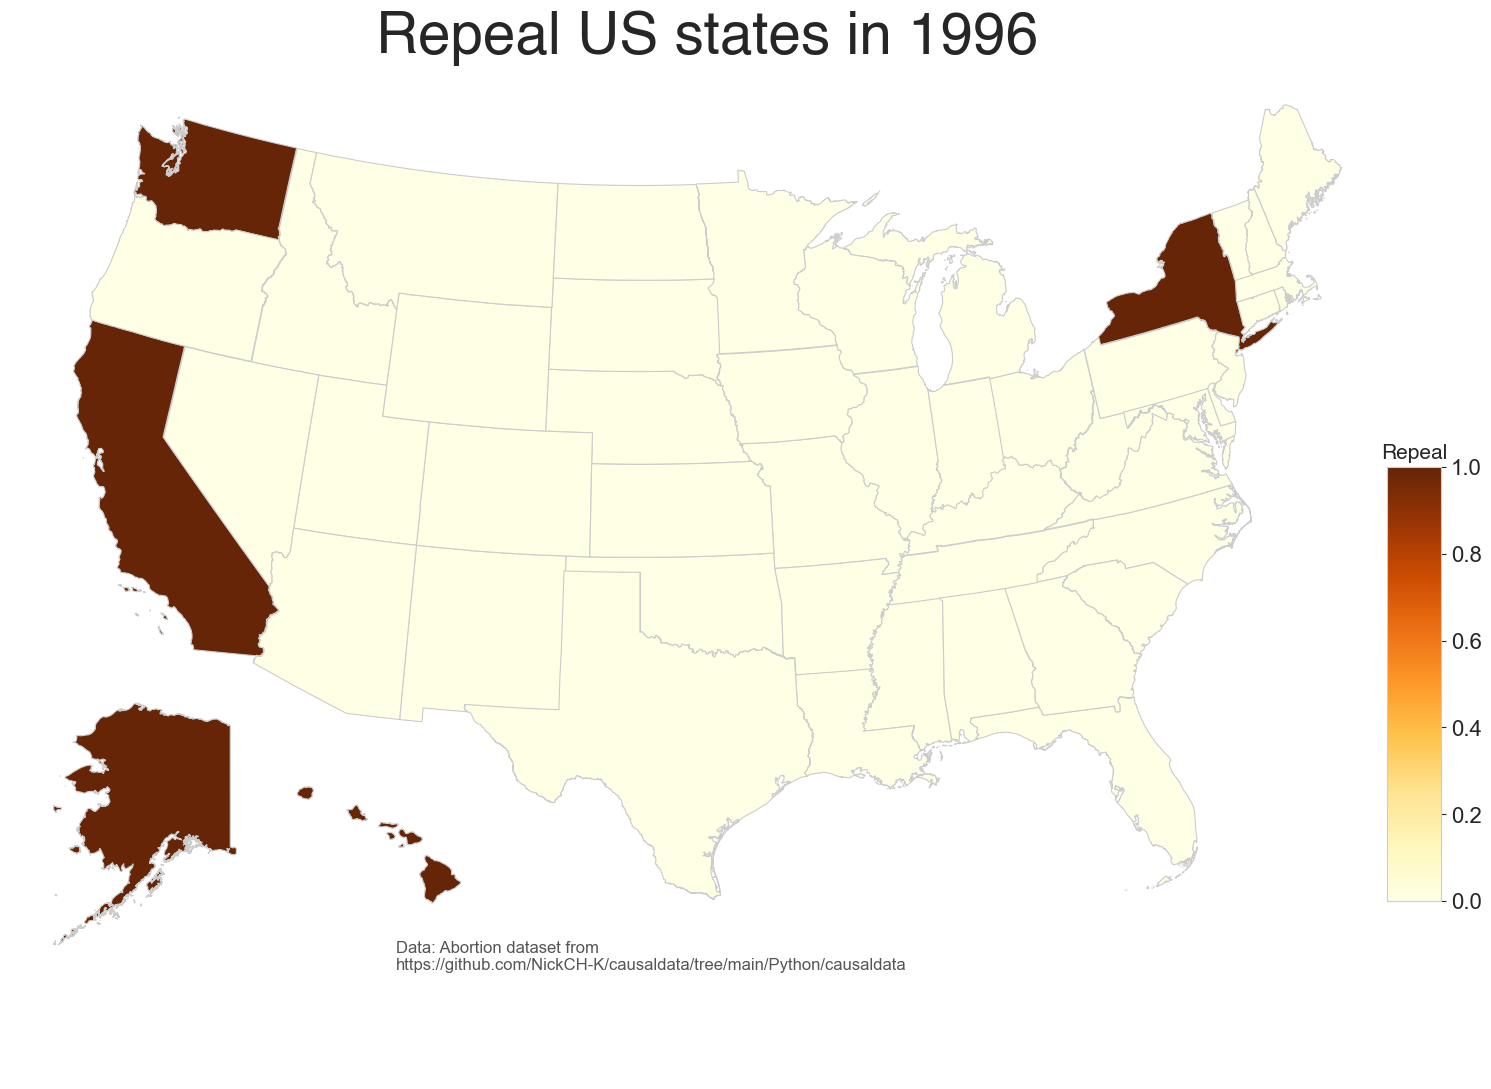

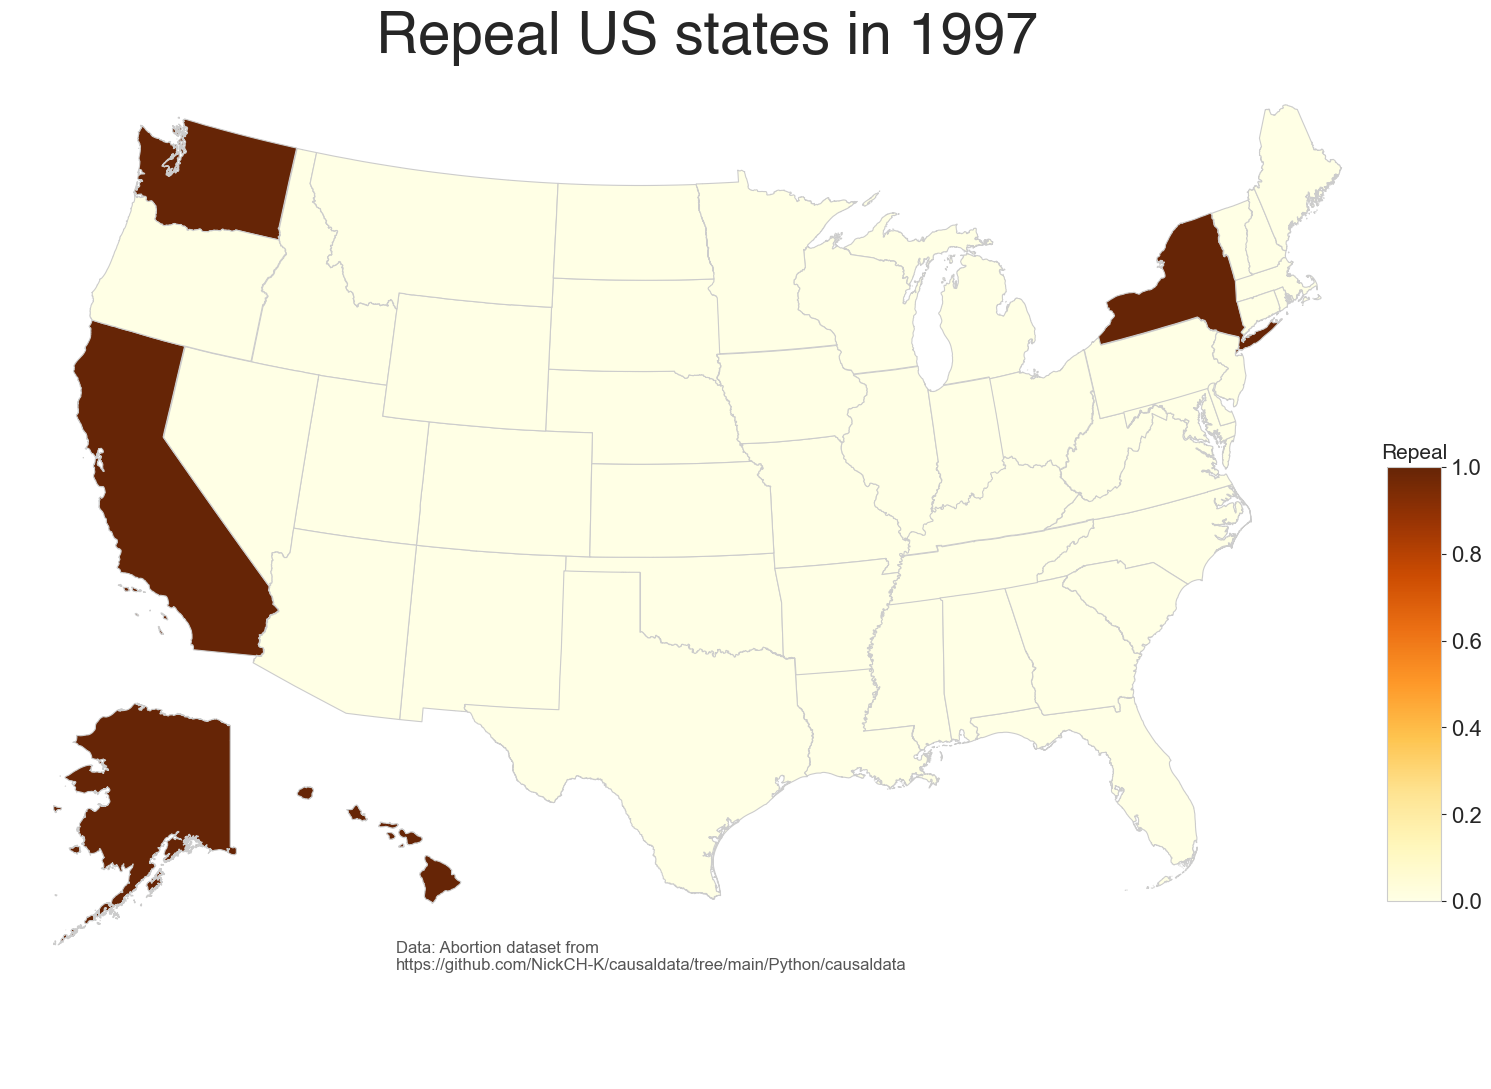

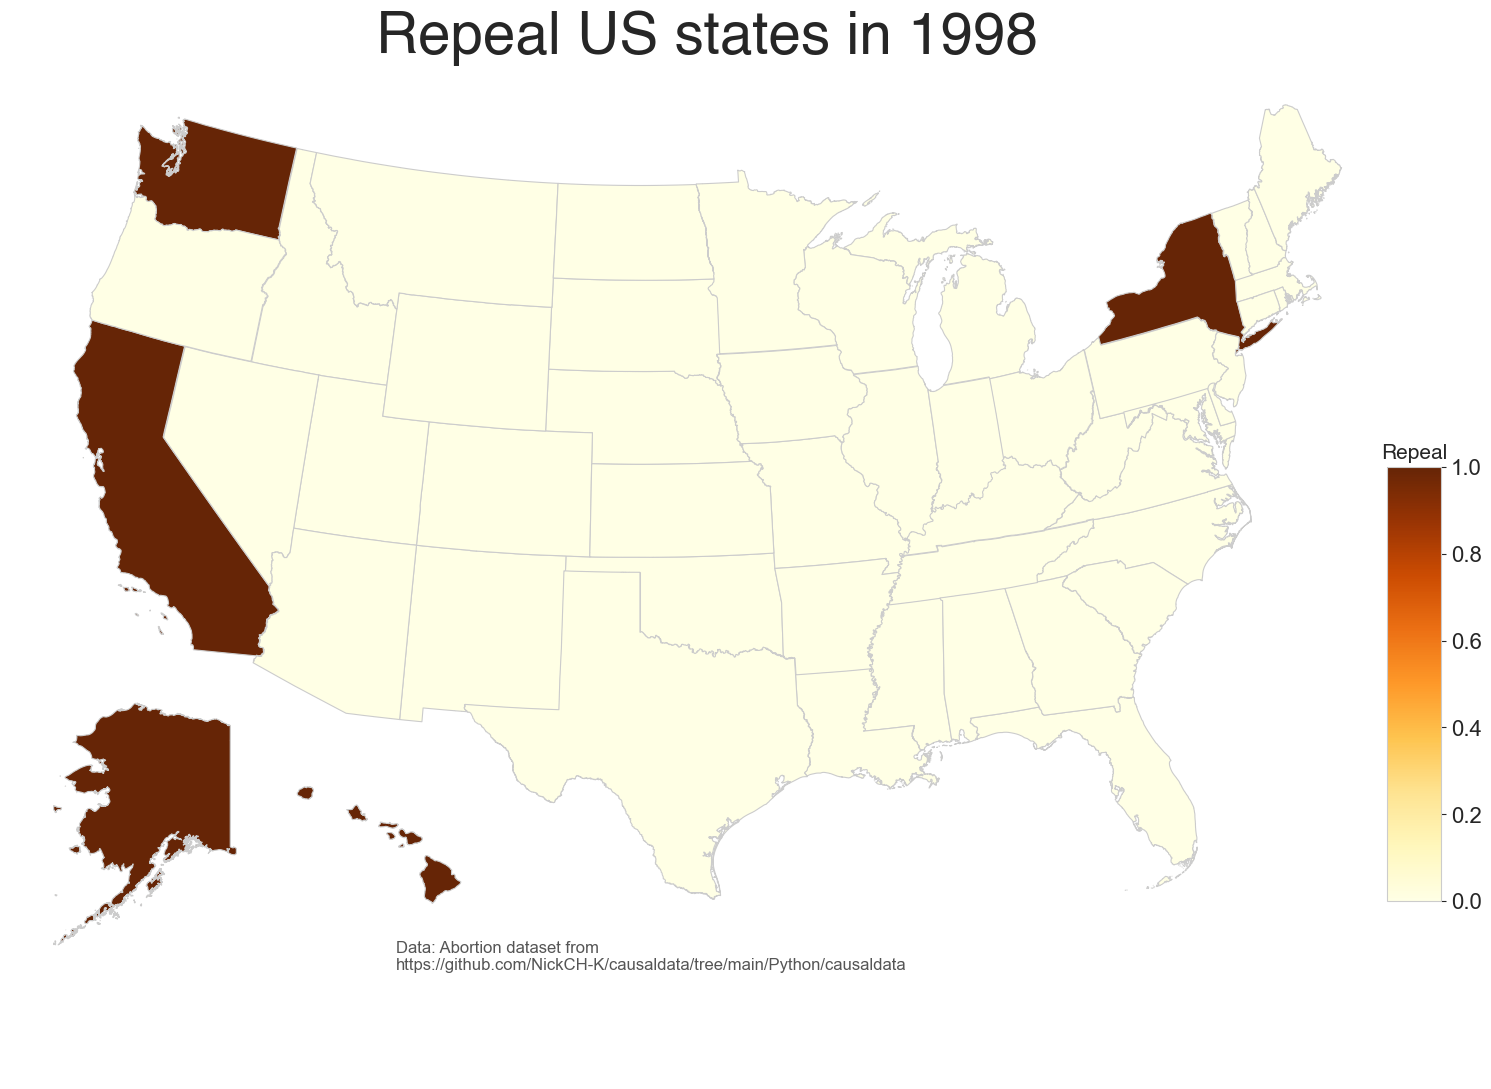

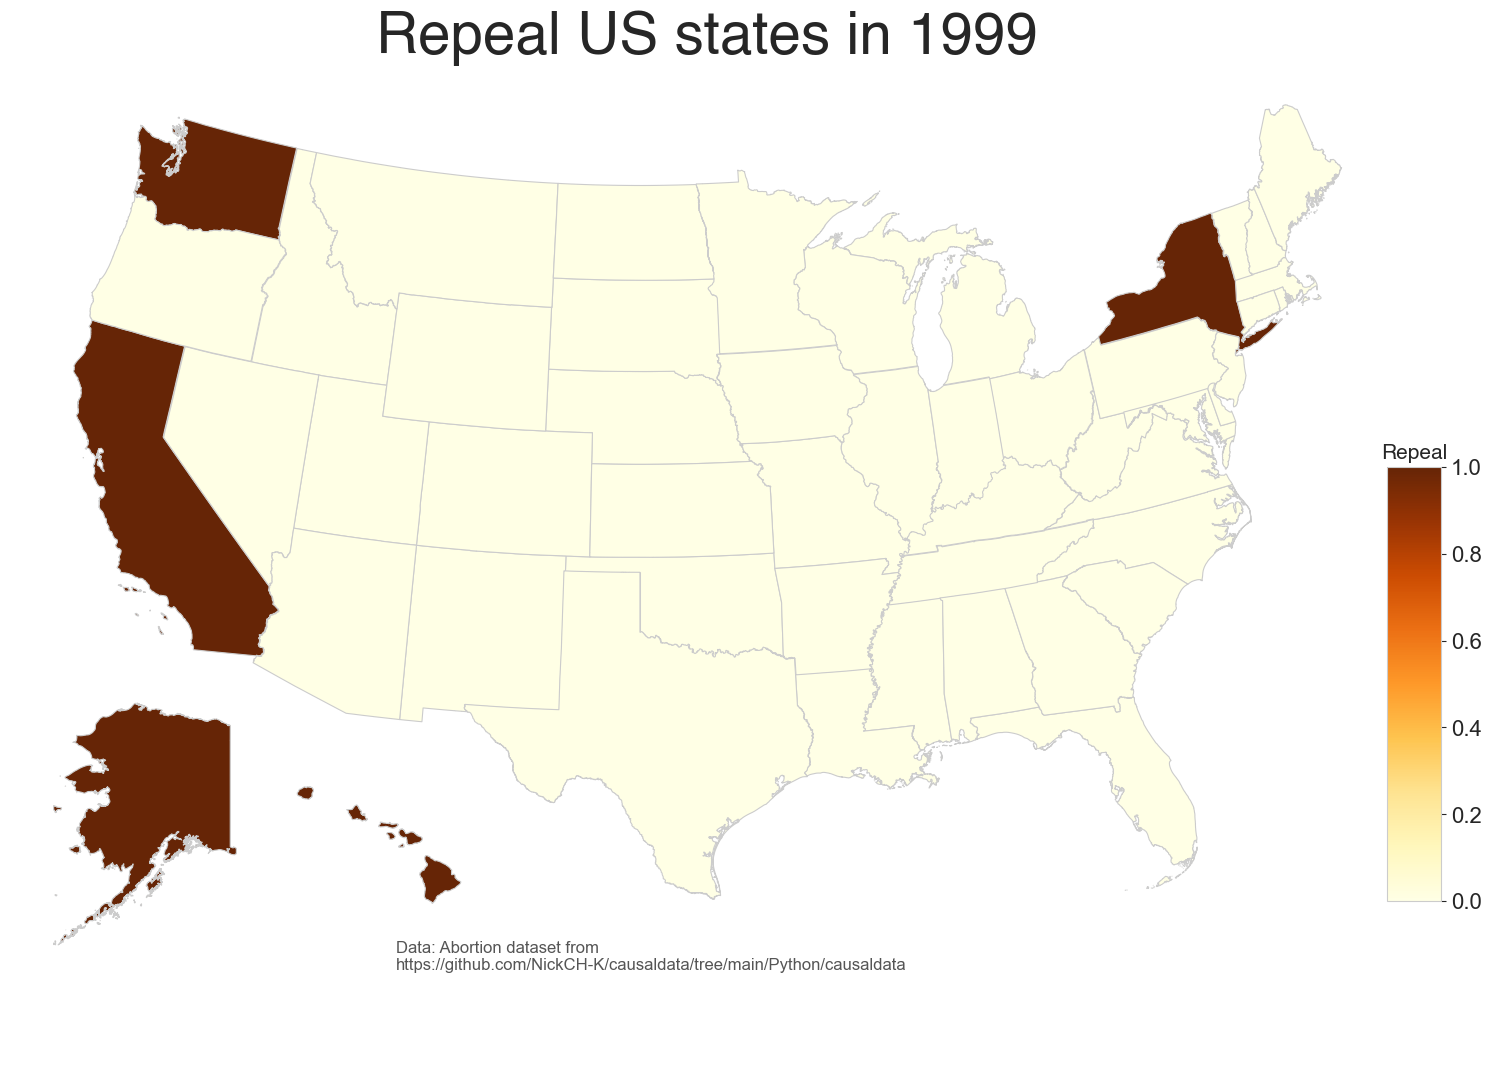

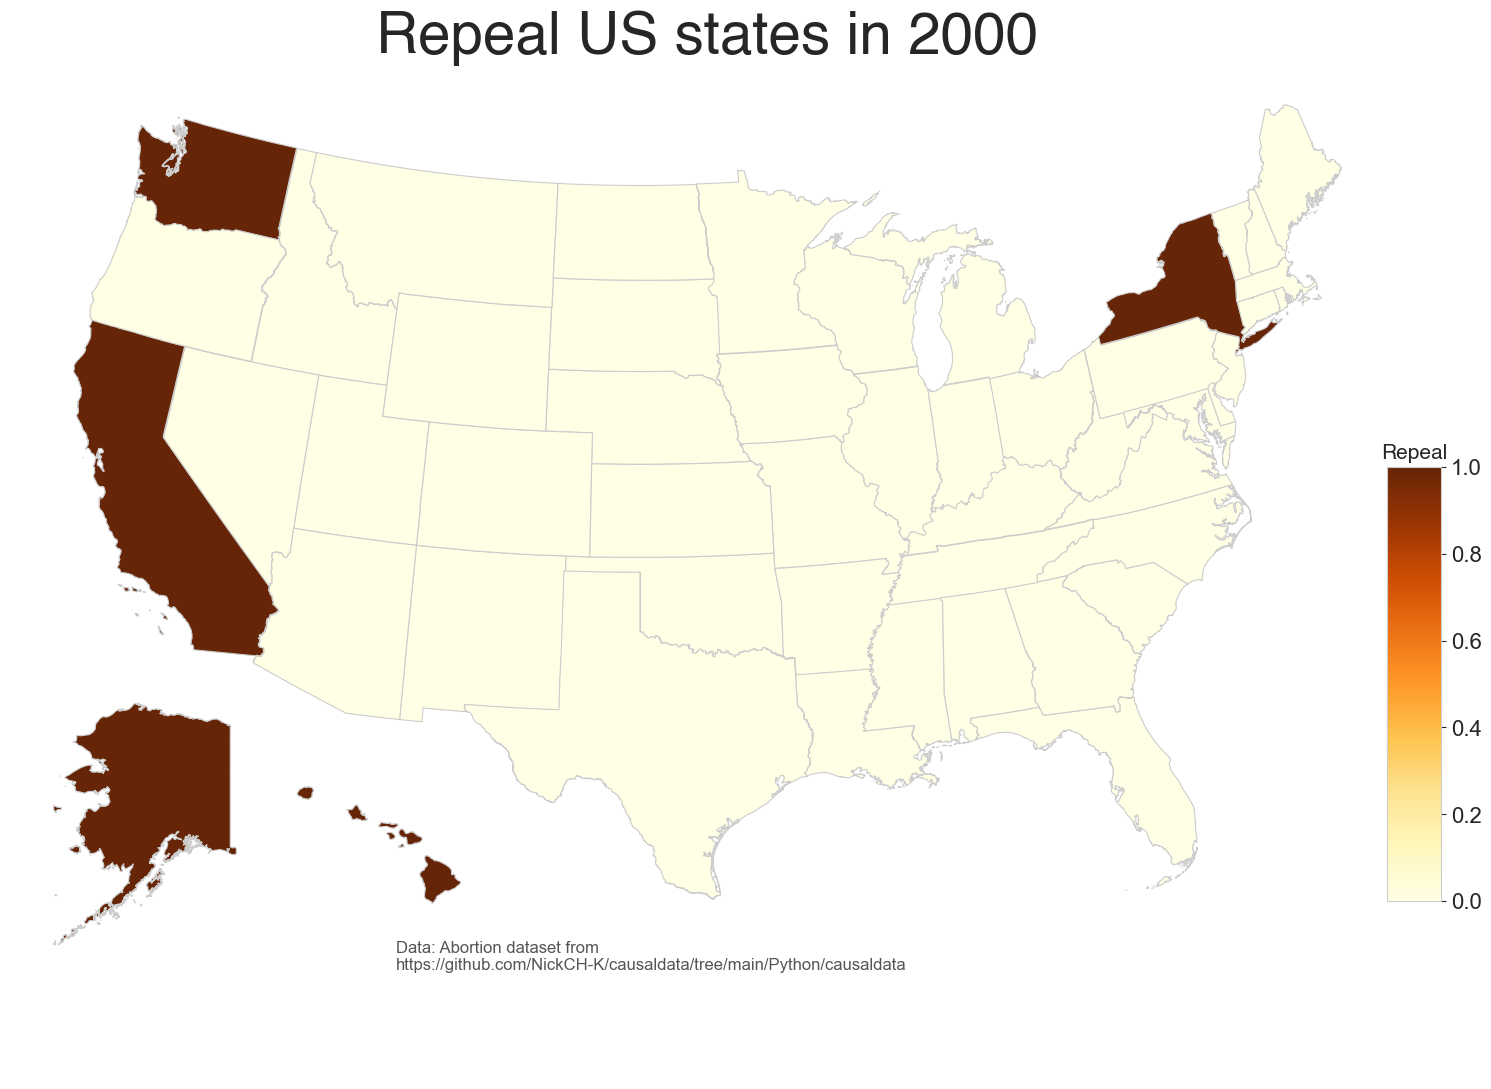

In [28]:
for year in range(1985, 2001):
    variable = 'repeal'
    fig_title = f'Repeal US states in {year}'
    cbar_title = 'Repeal'
    gdf_map = gdf_state[gdf_state['year'] == year]
    vmin, vmax = gdf_state[variable].min(), gdf_state[variable].max()
    
    plot_map(gdf_map, variable, fig_title, cbar_title, vmin, vmax, f'output/{variable}/{variable}_map_{year}.png', save=True, cbar_percent=False)


In [ ]:
gdf_state